# Аналитика в Яндекс.Афише

Данный проект - учебный. Все датасеты были предоставлены авторами курса "Аналитик данных" на образовательной платформе Яндекс.Практикум и являются интеллектуальной собственностью.

Цель проекта - помочь маркетологам Яндекс.Афиши оптимизировать маркетинговые затраты. У нас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши
- выгрузка всех заказов за этот период
- статистика рекламных расходов

Необходимо изучить:
- как люди пользуются продуктом
- когда они начинают покупать
- сколько денег приносит каждый клиент
- когда клиент окупается

## План выполнения проекта

[Шаг 1. Загрузка и подготовка данных](#step1)

[Шаг 2. Отчёты и метрики](#step2)

- [Продукт](#par.1)

- [Продажи](#par.2)

- [Маркетинг](#par.3)

[Шаг 3. Общий вывод](#step3)

## <a id="step1">Шаг 1. Загрузка и подготовка данных</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
visits_log = pd.read_csv(r'L:\Data Analyst\6. Анализ бизнес-показателей. Аналитика в Яндекс.Афише/visits_log.csv')
visits_log.sample(5)

Device               End Ts  Source Id             Start Ts  \
179182  desktop  2017-09-03 13:24:00          4  2017-09-03 13:12:00   
267748    touch  2017-12-08 19:18:00          3  2017-12-08 19:14:00   
53990   desktop  2017-11-17 19:39:00          4  2017-11-17 19:37:00   
184412  desktop  2017-12-15 16:11:00          4  2017-12-15 16:09:00   
358599    touch  2017-07-31 21:00:19          1  2017-07-31 21:00:00   

                         Uid  
179182   4621063304929868616  
267748  10115458767117705390  
53990    5578567509009708131  
184412   2769635922902645912  
358599   1456494224674263044

In [3]:
#приведем названия столбцов к нижнему регистру и заменим пробелы на нижнее подчеркивание
visits_log = visits_log.rename(columns={'Device': 'device', 'End Ts': 'end_ts', 'Source Id': 'source_id', 'Start Ts': 'start_ts', 'Uid': 'uid'})

In [4]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
#заменим тип данных на дату
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'], format='%Y-%m-%d %H:%M:%S')
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'], format='%Y-%m-%d %H:%M:%S')

In [6]:
#проверим на дубликаты
visits_log.duplicated().sum()

0

В таблице содержатся логи сервера с данными о посещениях сайта Яндекс.Афиши.

- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь

359400 строк и 5 столбцов. Пропусков и дубликатов нет. В столбцах с датой и времнем начала и окончания сессии мы поменяли тип данных на дату. Названия столбцов были приведены к более удобному виду.

In [7]:
orders_log = pd.read_csv(r'L:\Data Analyst\6. Анализ бизнес-показателей. Аналитика в Яндекс.Афише/orders_log.csv')
orders_log.sample(5)

Buy Ts  Revenue                   Uid
16437  2017-11-07 08:28:00     1.83  18394067260263126490
16097  2017-11-04 14:23:00     1.83  10566552478279832731
39464  2018-03-11 19:40:00     2.14  14761819362307042569
16048  2017-11-04 03:18:00     1.11   8849966431667305406
20527  2017-11-27 19:23:00     3.67   6133978210811592095

In [8]:
#приведем названия столбцов к нижнему регистру и заменим пробелы на нижнее подчеркивание
orders_log = orders_log.rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid': 'uid'})
#заменим тип данных на дату
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'], format='%Y-%m-%d %H:%M:%S')

In [9]:
#проверим на дубликаты
orders_log.duplicated().sum()

0

In [10]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


В выгрузке всех заказов за этот период с июня 2017 по конец мая 2018 года 3 столбца и 50415 строк. Пропусков и дубликатов нет. Таблица содержит следующие данные:

- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа

In [11]:
costs = pd.read_csv(r'L:\Data Analyst\6. Анализ бизнес-показателей. Аналитика в Яндекс.Афише/costs.csv')
costs.sample(5)

source_id          dt   costs
1837          9  2017-06-22   11.05
726           3  2017-06-01  349.38
753           3  2017-06-28  200.73
681           2  2018-04-17   99.44
248           1  2018-02-04   49.93

In [12]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [13]:
#заменим тип данных на дату
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

In [14]:
#проверим на дубликаты
costs.duplicated().sum()

0

Cтатистика рекламных расходов состоит из 3 столбцов и 2542 строк и содержит следующую информацию: 

- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

### Вывод

В нашем распоряжении три таблицы с даными о визитах, заказах и рекламных расходах. Во всех таблицах отсутствуют пропуски и дубликаты строк,во всех столбцах с датой был изменен тип данных, столбцы были переименнованы в соответсвии с общепринятым стандартом. 

## <a id="step2">Шаг 2. Отчёты и метрики</a>

## <a id="par.1">Продукт</a>

### Количество пользователей за день, неделю, месяц

In [15]:
#создадим столбцы с датой, годом, месяцем и неделей
visits_log['session_year']  = visits_log['start_ts'].dt.year
visits_log['session_month'] = visits_log['start_ts'].dt.month
visits_log['session_week']  = visits_log['start_ts'].dt.week
visits_log['session_date'] = visits_log['start_ts'].dt.date

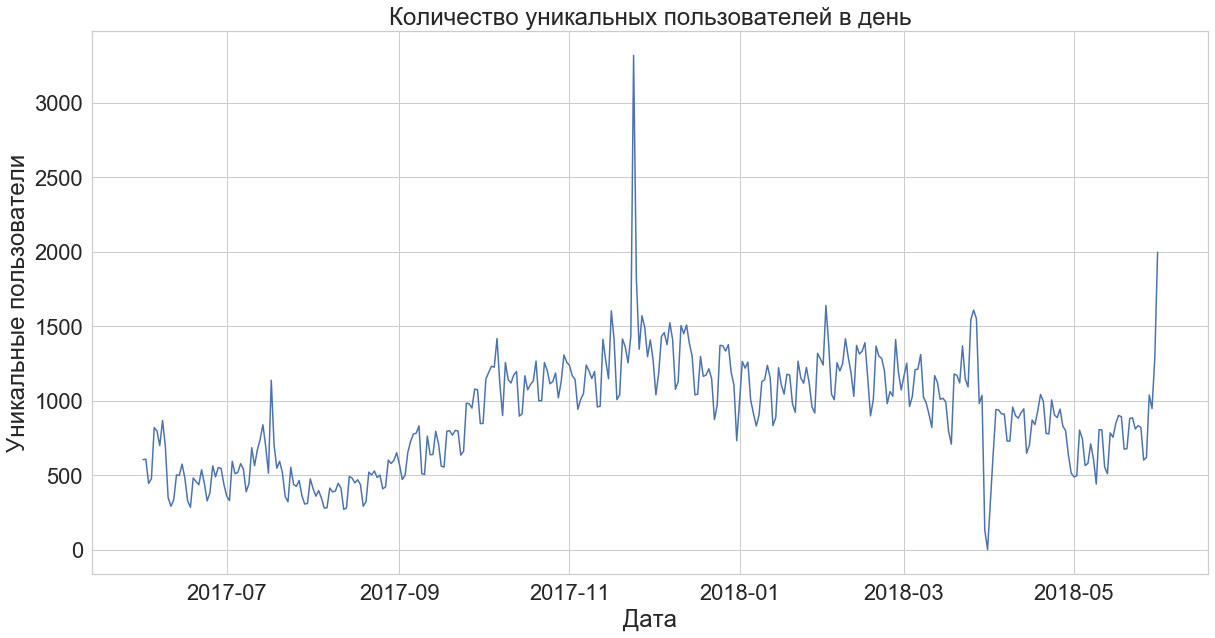

In [16]:
#посмотрим на количество уникальных пользователей в день
dau = visits_log.groupby('session_date').agg({'uid': 'nunique'}).reset_index()
sns.set(style='whitegrid', font_scale=2)
plt.subplots(figsize = (20, 10))
sns.lineplot(x='session_date', y='uid', data = dau)
plt.title('Количество уникальных пользователей в день')
plt.ylabel('Уникальные пользователи')
plt.xlabel('Дата')
plt.show()

In [17]:
#очень сильно выделяется одна дата зимой, посмотрим что это за дата
dau.sort_values(by='uid', ascending=False).head(5)

session_date   uid
176   2017-11-24  3319
363   2018-05-31  1997
177   2017-11-25  1817
245   2018-02-01  1640
298   2018-03-26  1609

In [18]:
dau_total = visits_log.groupby('session_date').agg({'uid': 'nunique'}).mean()
print('Среднее количество уникальных пользователей в день за последний год:', int(dau_total))

Среднее количество уникальных пользователей в день за последний год: 907


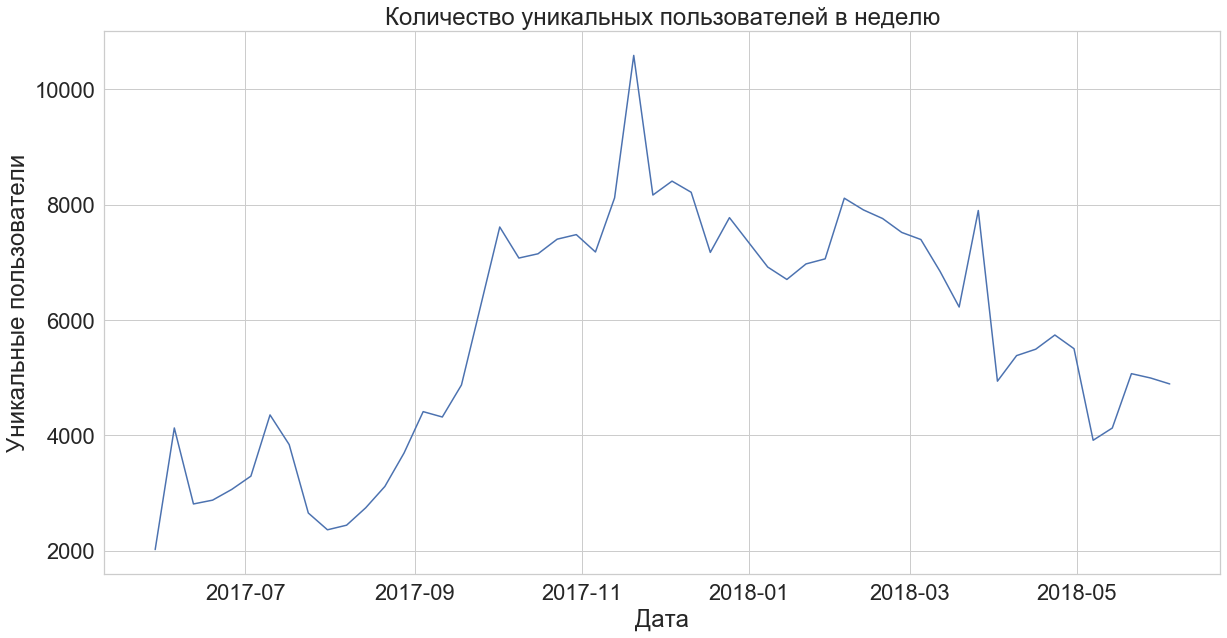

In [19]:
#посмотрим на количество уникальных пользователей в неделю
wau = visits_log.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).reset_index()
#создадим столбец, куда запишем год и неделю
wau['week_yr'] = pd.to_datetime(wau['session_year'].astype(str) + ' ' + wau['session_week'].astype(str) + ' 1',
                                format='%Y %U %w')
sns.set(style='whitegrid', font_scale=2)
plt.subplots(figsize = (20, 10))
sns.lineplot(x='week_yr', y='uid', data = wau)
plt.title('Количество уникальных пользователей в неделю')
plt.ylabel('Уникальные пользователи')
plt.xlabel('Дата')
plt.show()

In [20]:
wau_total = visits_log.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
print('Среднее количество уникальных пользователей в неделю за последний год', int(wau_total))

Среднее количество уникальных пользователей в неделю за последний год 5716


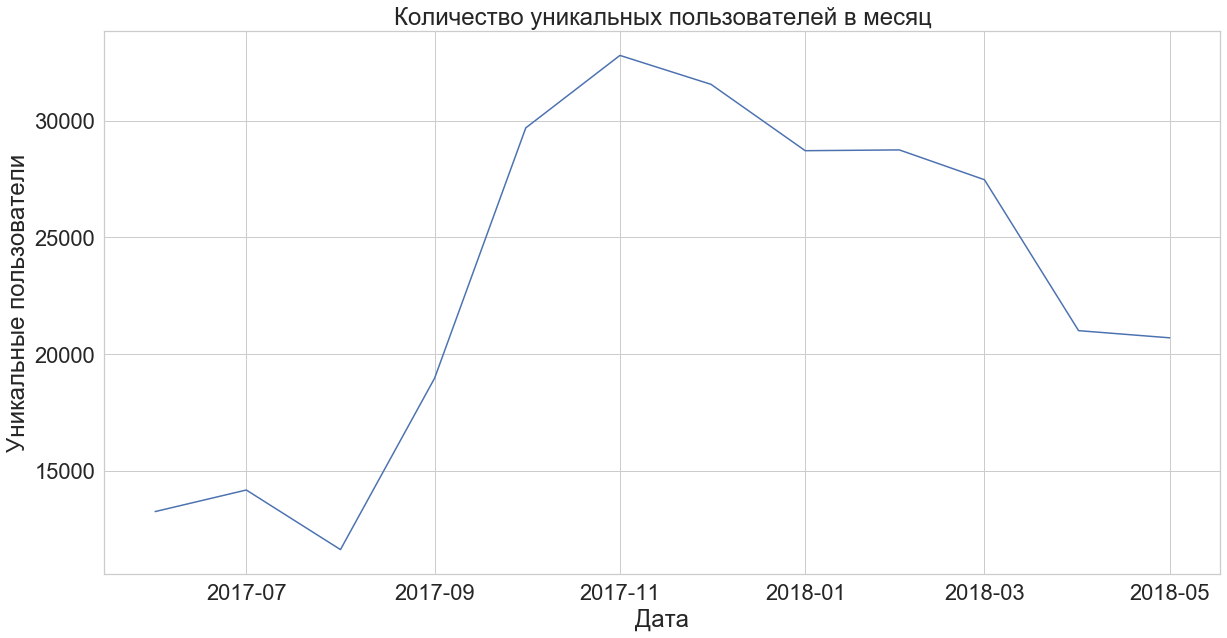

In [21]:
mau = visits_log.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).reset_index()
#создадим столбец, куда запишем год и месяц
mau['month_yr'] = pd.to_datetime(mau['session_year'].astype(str) + ' ' + mau['session_month'].astype(str),
                                format='%Y %m')
sns.set(style='whitegrid', font_scale=2)
plt.subplots(figsize = (20, 10))
sns.lineplot(x='month_yr', y='uid', data = mau)
plt.title('Количество уникальных пользователей в месяц')
plt.ylabel('Уникальные пользователи')
plt.xlabel('Дата')
plt.show()

In [22]:
mau_total = visits_log.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('Среднее количество уникальных пользователей в месяц за последний год', int(mau_total))

Среднее количество уникальных пользователей в месяц за последний год 23228


### Sticky factor

In [23]:
sticky_wau = dau_total / wau_total * 100
print('Sticky Factor (за неделю):', round(sticky_wau[0], 2), '%')
sticky_mau = dau_total / mau_total * 100
print('Sticky Factor (за месяц):', round(sticky_mau[0], 2), '%')

Sticky Factor (за неделю): 15.88 %
Sticky Factor (за месяц): 3.91 %


### Вывод

Количество уникальных пользователей начало увеличиваться осенью 2017 года и достигло своего пика зимой. Особенно выделяется дата 24 ноября 2017 года, в этот день приложением пользовались 3319 человек. Скорее всего такой всплеск связан с какой-то маркетинговой активностью. 31 марта уникальный пользователь был всего один, возможно из-за технических неполадкок. Sticky factor находится в пределах нормы, но лучше этот вопрос уточнить с экспертами. 

### Количество сессий в день

In [24]:
sessions_per_day = visits_log.groupby('session_date').agg({'uid': ['count','nunique']})
sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['sessions_per_user'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']
sessions_per_day['sessions_per_user'].describe()

count    364.000000
mean       1.082170
std        0.020876
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: sessions_per_user, dtype: float64

### Количество сессий в месяц

In [25]:
sessions_per_month = visits_log.groupby(['session_year', 'session_month']).agg({'uid': ['count','nunique']})
sessions_per_month.columns = ['n_sessions', 'n_users']
sessions_per_month['sessions_per_user'] = sessions_per_month['n_sessions'] / sessions_per_month['n_users']
sessions_per_month['sessions_per_user'].describe()

count    12.000000
mean      1.280889
std       0.032217
min       1.234202
25%       1.259190
50%       1.281448
75%       1.294672
max       1.340641
Name: sessions_per_user, dtype: float64

### Вывод

В среднем пользователь заходит в приложение Яндекс.Афиша один раз в день. Но к сожалению он это делает не каждый день. И в среднем каждый уникальный пользователь открывает приложение чуть чаще чем, один раз в месяц.

### Средняя продолжительность сессии или ASL (average session length)

In [26]:
#посчитаем продолжительность сессии в секундах
visits_log['session_duration_sec'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds
visits_log['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

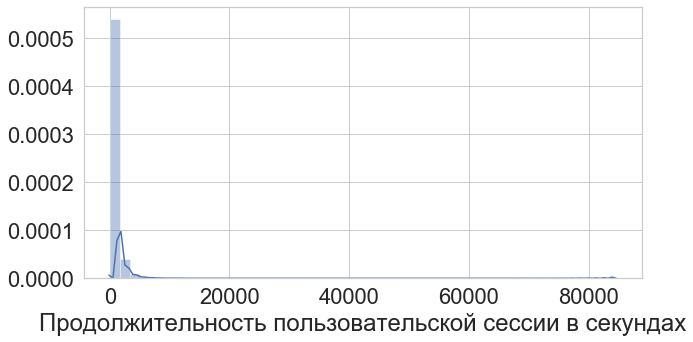

In [27]:
#посомтрим на распределение
sns.set(style='whitegrid', font_scale=2)
plt.subplots(figsize = (10, 5))
sns.set_color_codes('pastel')
sns.distplot(visits_log['session_duration_sec'])
plt.xlabel('Продолжительность пользовательской сессии в секундах')
plt.show()

In [28]:
#из-за того, что есть пик около нуля и значительные выбросы с высокими значениями, 
#то для понимания средней продолжительности пользовательской сессии лучше взять моду
visits_log['session_duration_sec'].mode()[0]

60

In [29]:
#посмотрим срез по мобильным устройствам
visits_log.query('device == "touch"')['session_duration_sec'].mode()[0]

60

In [30]:
#посмотрим срез по десктопной версии
visits_log.query('device == "desktop"')['session_duration_sec'].mode()[0]

60

### Вывод

В среднем пользователь проводит в приложении 1 минуту, вне зависимости от типа устройства, которое он использует. Этого времени должно быть достаточно, чтобы найти интересующее мероприятие, но скорее всего понадобится больше времени, чтобы купить билеты именно через приложение Яндекс.Афиша. Нужно понять, теряют ли люди полностью интерес к тому, что нашли, или уходят на другие ресурсы, чтобы купить там билет. 

### Retention Rate

In [31]:
#найдем дату, когда пользователь впервые проявил активность в приложении
first_activity_date = visits_log.groupby(['uid'])['session_date'].min()
first_activity_date.name = 'first_activity_date'
visits_log = visits_log.join(first_activity_date,on='uid')

In [32]:
#выделим месяц
visits_log['first_activity_month'] = visits_log['first_activity_date'].astype('datetime64[M]')
visits_log['activity_month'] = visits_log['session_date'].astype('datetime64[M]')

In [33]:
#посчитаем время жизни когорты
visits_log['cohort_lifetime'] = visits_log['activity_month'] - visits_log['first_activity_month']
visits_log['cohort_lifetime'] = visits_log['cohort_lifetime'] / np.timedelta64(1,'M')
visits_log['cohort_lifetime'] = visits_log['cohort_lifetime'].round().astype('int')

In [34]:
#cгруппируем данные по когорте и lifetime
cohorts = visits_log.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
#Найдём исходное количество пользователей в когорте
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
#уберем лишнее в дате, оставим только год и месяц
cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y-%m')
#рассчитаем Retention Rate
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

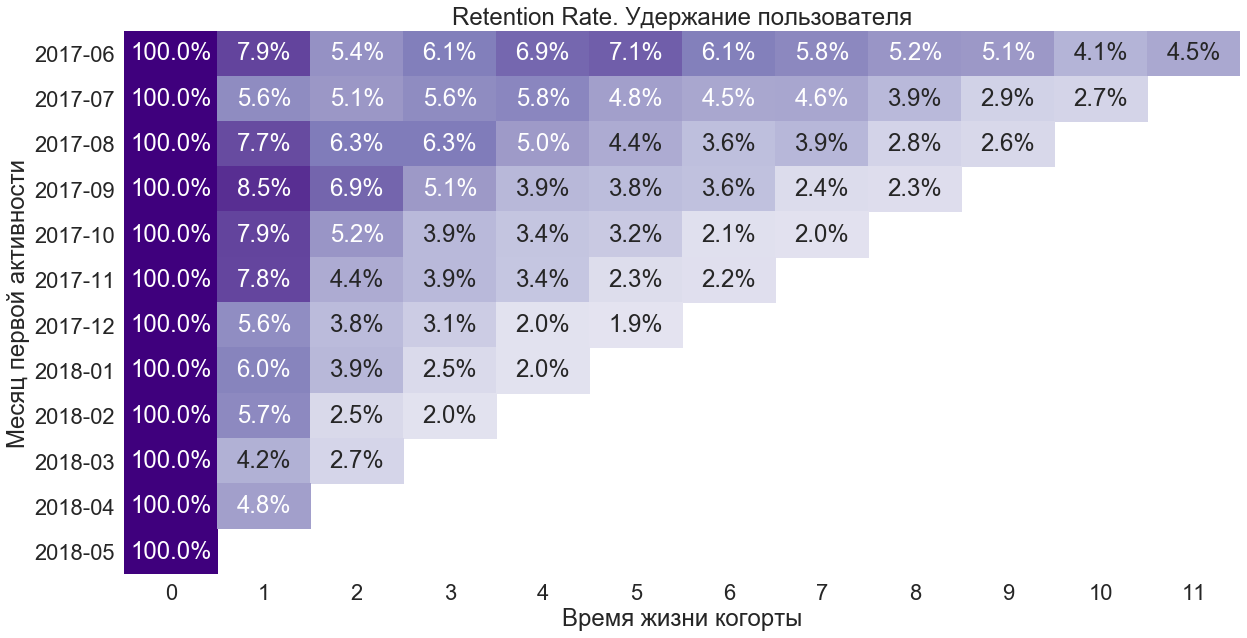

In [35]:
plt.subplots(figsize = (20, 10))
sns.heatmap(retention_pivot, annot=True, fmt='.1%', cmap='Purples', vmin=0, vmax=0.1, cbar=False)
plt.title('Retention Rate. Удержание пользователя')
plt.xlabel('Время жизни когорты')
plt.ylabel('Месяц первой активности')
plt.show()

In [36]:
print('В среднем на второй месяц возвращается', round(retention_pivot[1].mean() * 100, 1), '% пользователей')

В среднем на второй месяц возвращается 6.5 % пользователей


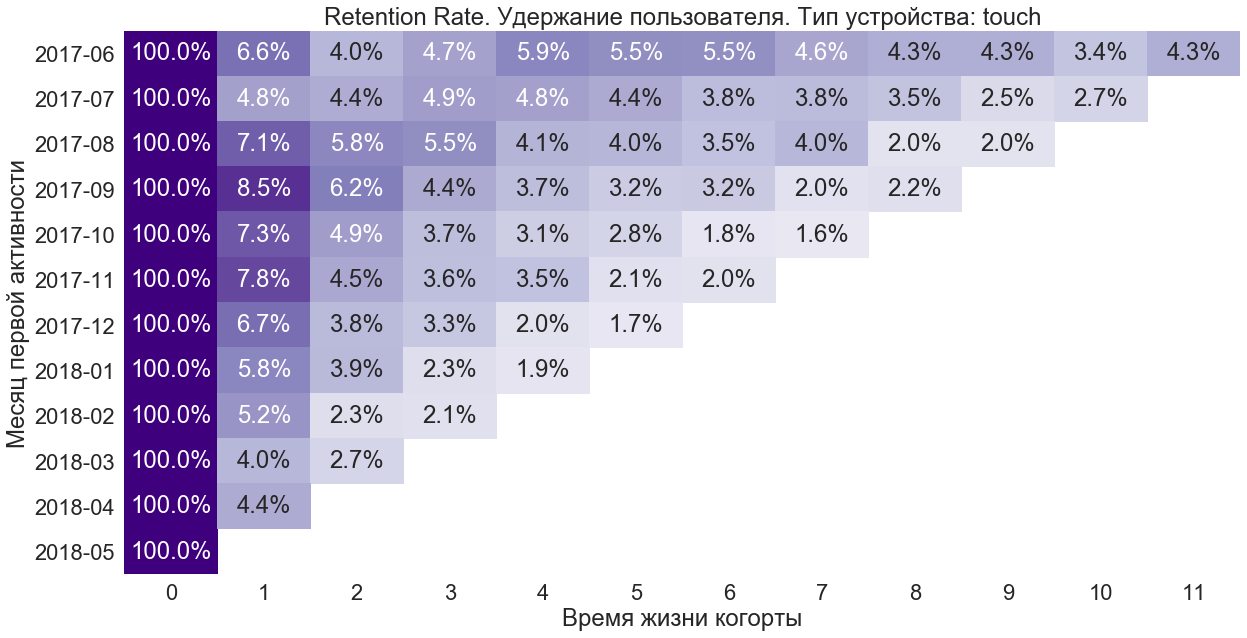

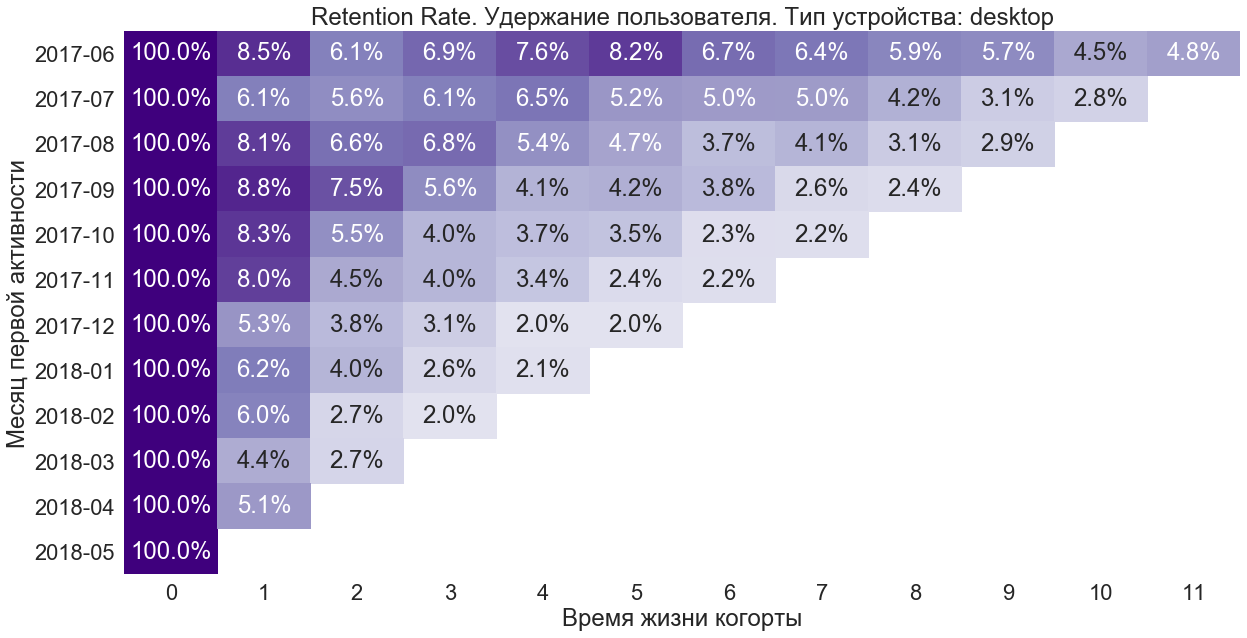

In [37]:
#посмотрим на разбивку по типам устройства
devices = visits_log['device'].unique()
for device in devices:
    d_visits_log = visits_log[visits_log['device'] == device]
    cohorts = d_visits_log.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
    initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
    initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
    cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
    cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y-%m')
    cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
    d_retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
    plt.subplots(figsize = (20, 10))
    sns.heatmap(d_retention_pivot, annot=True, fmt='.1%', cmap='Purples', vmin=0, vmax=0.1, cbar=False)
    plt.title('Retention Rate. Удержание пользователя. Тип устройства: ' + str(device))
    plt.xlabel('Время жизни когорты')
    plt.ylabel('Месяц первой активности')

Retention Rate довольно низкий уже на второй месяц использования приложения, лучший результат всего 8 с небольшим процента, причем тип устройства не играет значительной роли, хоть и видно, что десктопная версия чувствует себя немножечко лучше. И если в 2017 году клиенты ещё иногда возвращались, то в 2018 они почти перестали это делать и retention rate на второй месяц составляет всего лишь 4-6%. Над удержанием пользователей нужно работать, необходимо пристальнее изучить pain points клиентов и понять, чего им не хватает в нашем ресурсе.

In [38]:
#найдем точное время первой сессии
first_session_time = visits_log.groupby(['uid'])['start_ts'].min()
first_session_time.name = 'first_session_time'
visits_log = visits_log.join(first_session_time,on='uid')

In [39]:
#найдём источник, из которого первый раз пришел покупатель
first_click_source_id = visits_log.query('first_session_time == start_ts').groupby(['uid'])['source_id'].min() #min() здесь конечно не нужен, но без него почему то не работает. В любом случае для каждого uid там всё равно только одно значение source_id
first_click_source_id.name = 'first_click_source_id'
visits_log = visits_log.join(first_click_source_id, on='uid')
orders_log = orders_log.join(first_click_source_id, on='uid')

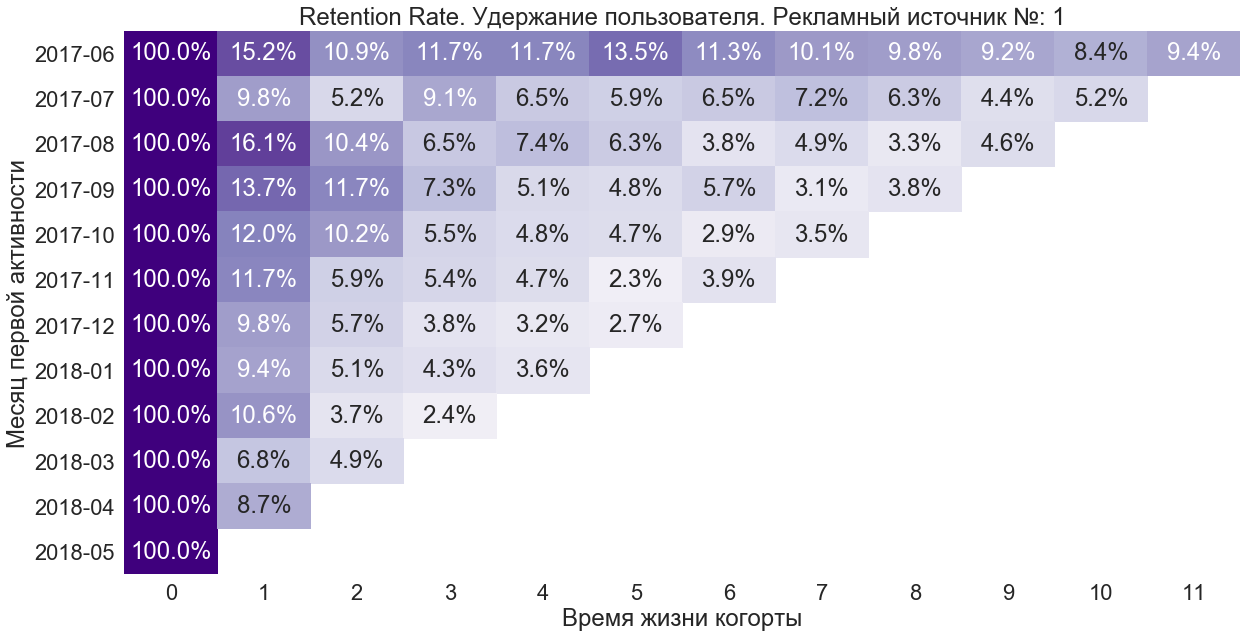

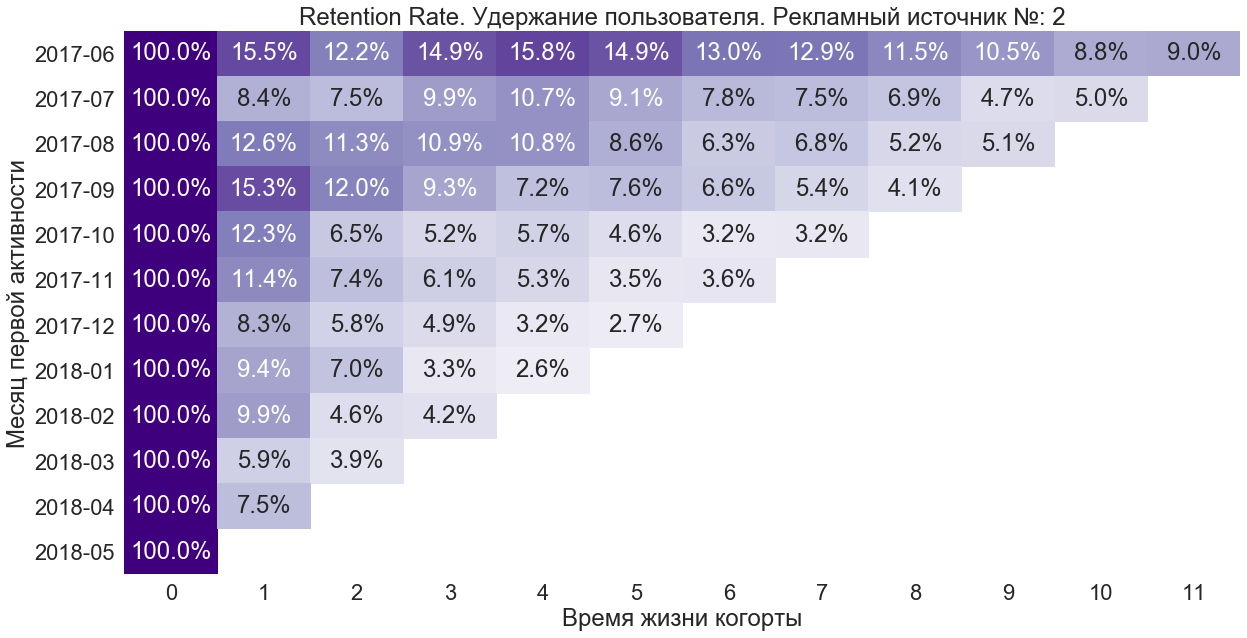

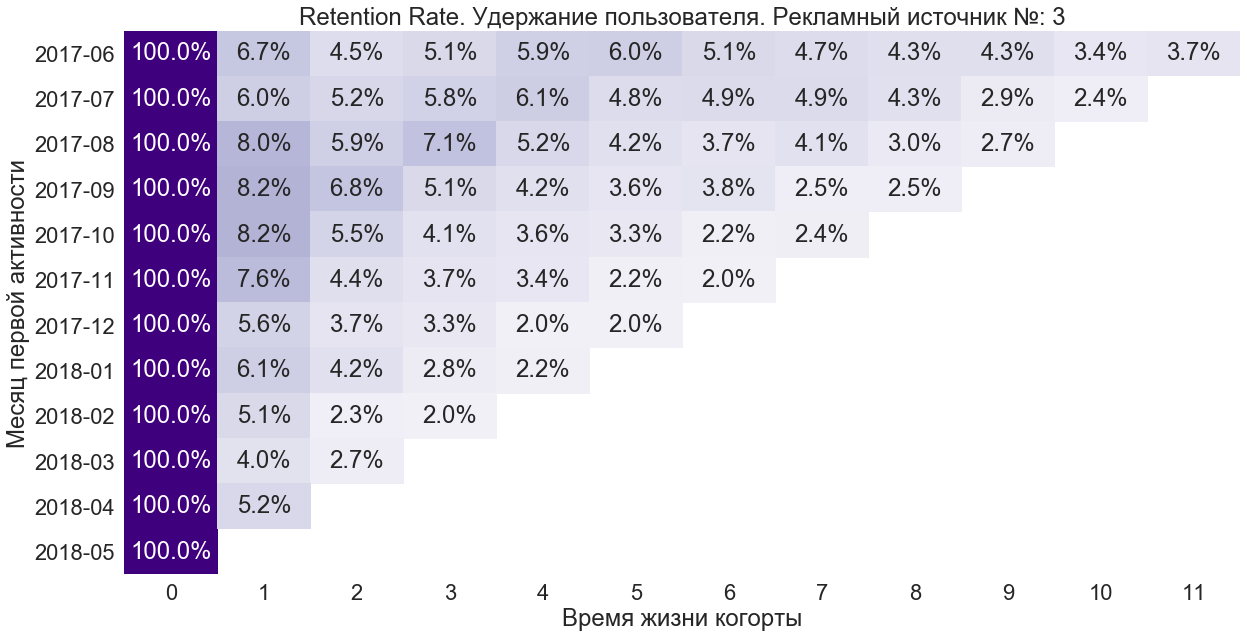

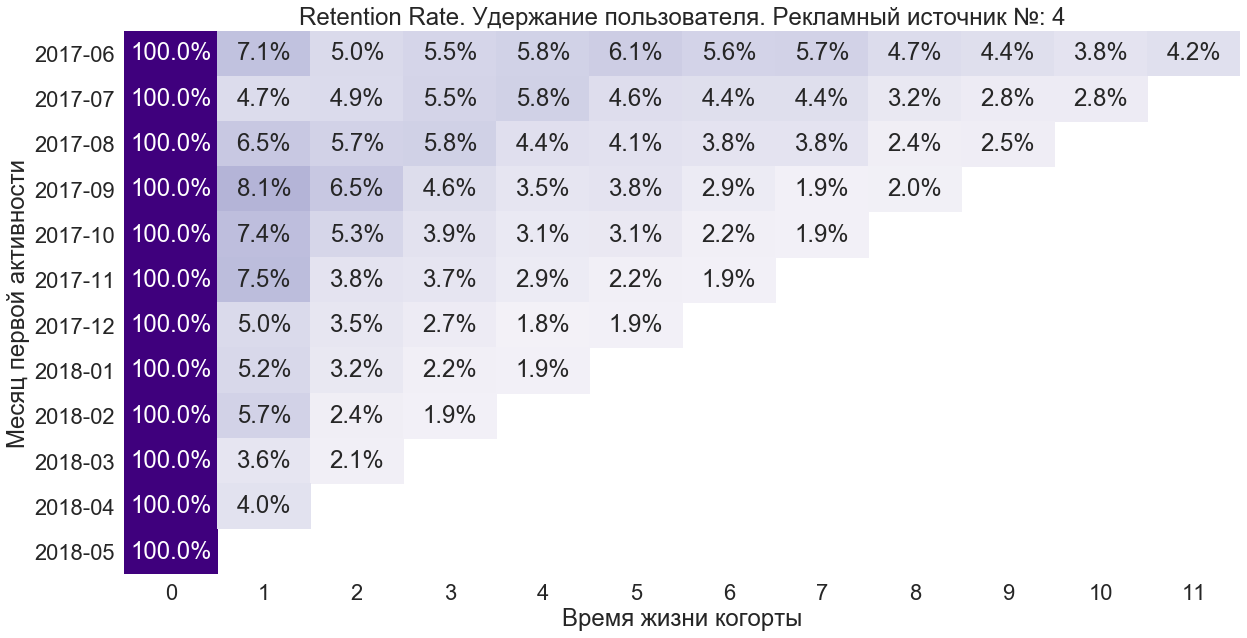

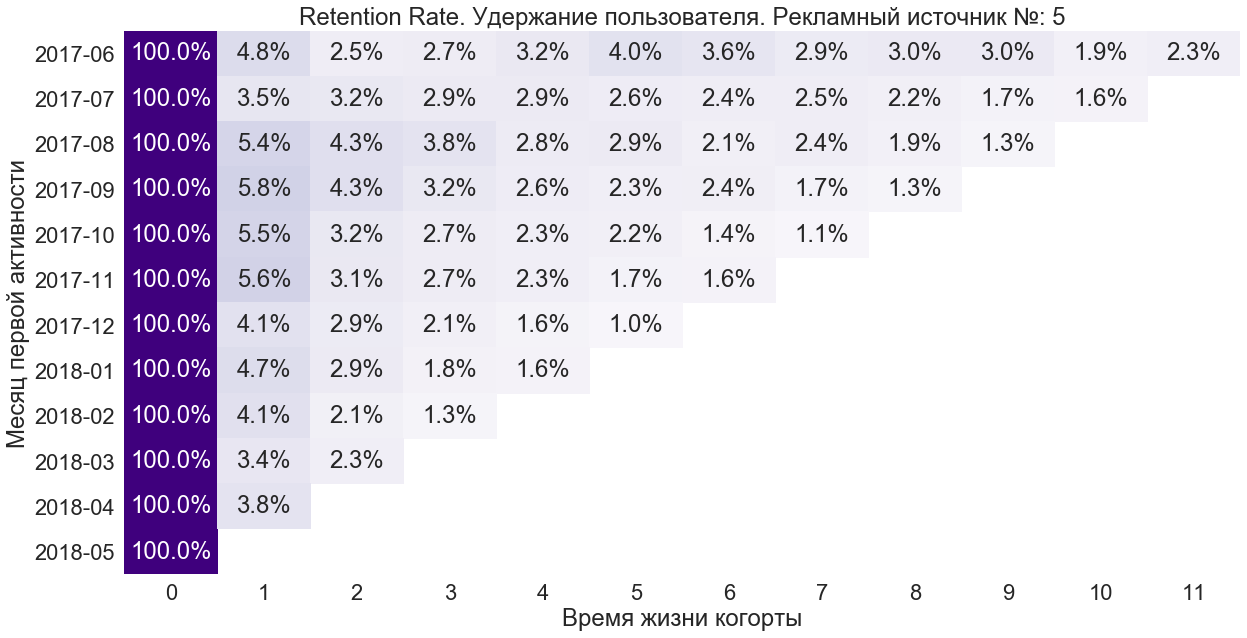

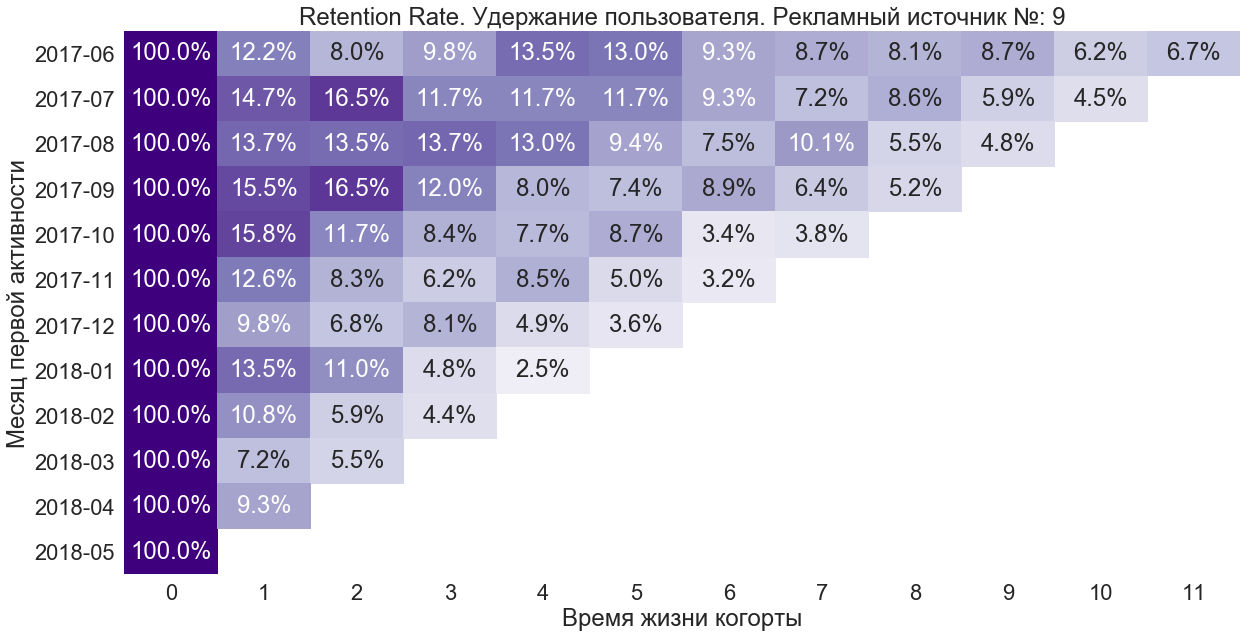

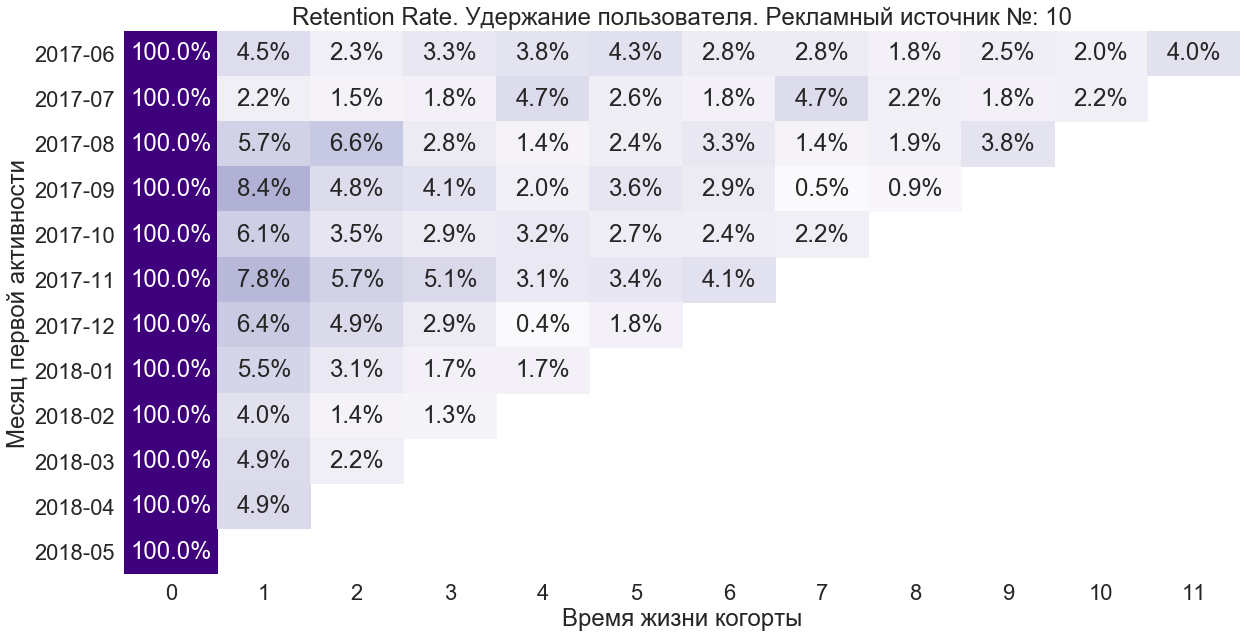

In [40]:
#посмотрим на разбивку по типам рекламных источников
sources = np.sort(visits_log['first_click_source_id'].unique())
#удалим источники 6 и 7, т.к. по ним нет достаточного количества данных
sources = np.delete(sources, np.argwhere(sources == 6))
sources = np.delete(sources, np.argwhere(sources == 7))
for source in sources:
    s_visits_log = visits_log[visits_log['first_click_source_id'] == source]
    cohorts = s_visits_log.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
    initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
    initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
    cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
    cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y-%m')
    cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
    s_retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
    plt.subplots(figsize = (20, 10))
    sns.heatmap(s_retention_pivot, annot=True, fmt='.1%', cmap='Purples', vmin=0, vmax=0.2, cbar=False)
    plt.title('Retention Rate. Удержание пользователя. Рекламный источник №: ' + str(source))
    plt.xlabel('Время жизни когорты')
    plt.ylabel('Месяц первой активности')

Разбивка метрики retention rate по рекламным источникам показала, что самыми лояльными оказались пользователи из первого, второго и девятых источников. Реже всех в приложение возвращаются люди, которые отреагировали на рекламу из пятого источника.

### Вывод

Количество пользователей возрастает по мере того, как изменяется погода. Чем холоднее становится на улице, тем больше людей ищут информацию о возможных способах провести вермя в помещении. Поэтому пик посетителей зафиксирован именно зимой. В среднем юзер находит интересующее его мероприятие за 60 секунд, но может провести на сайте или в приложении и несколько часов. Однако скорее всего это связано с незакрытой активной вкладкой. Люди довольно редко пользуются приложением, первый визит часто оказывается последним в этот день, и даже в тот же месяц. В среднем на второй месяц возвращется около 6.5% пользователей, это низкий показатель, пора кричать: "караул!"

## <a id="par.2">Продажи</a>

В таблице orders_log есть 51 заказ с нулевой ревенью, скорее всего люди регистрировались на бесплатные мероприятия, или прибретали билеты, используя подарочный сертификат. В любом случае, такие транзакции денег компании не принесли, и лучше удалить их.

In [41]:
orders_log = orders_log[orders_log['revenue'] != 0]

### Время между первой сессией и первой покупкой 

In [42]:
#найдем точное время первой покупки, время первой сессии посчитано выше
first_buy_time = orders_log.groupby(['uid'])['buy_ts'].min()
first_buy_time.name = 'first_buy_time'
orders_log = orders_log.join(first_buy_time,on='uid')

In [43]:
#проверим все ли кто купил, попали в таблицу с визитами
orders_log['uid'].isin(visits_log['uid']).value_counts()

True    50364
Name: uid, dtype: int64

In [44]:
#раз все попали, то объединим таблица заказов и визитов по таблице заказов
buying_activity = pd.merge(orders_log, visits_log, how='left', on='uid')

In [45]:
#удалим дубликаты пользователей, датасет сильно похудеет и в нём остануться только пользователи и их первые покупки
first_buying_activity = buying_activity.drop_duplicates(subset=['uid']).reset_index(drop = True)

In [46]:
#проверим есть ли такая аномалия, где пользователи купили раньше, чем совершили первый визит
first_buying_activity[first_buying_activity['first_buy_time'] < first_buying_activity['first_session_time']].shape[0]

0

In [47]:
#аномалий нет, считаем срок между первой сессией и первой покупкой
first_buying_activity['order_time'] = first_buying_activity['first_buy_time'] - first_buying_activity['first_session_time']

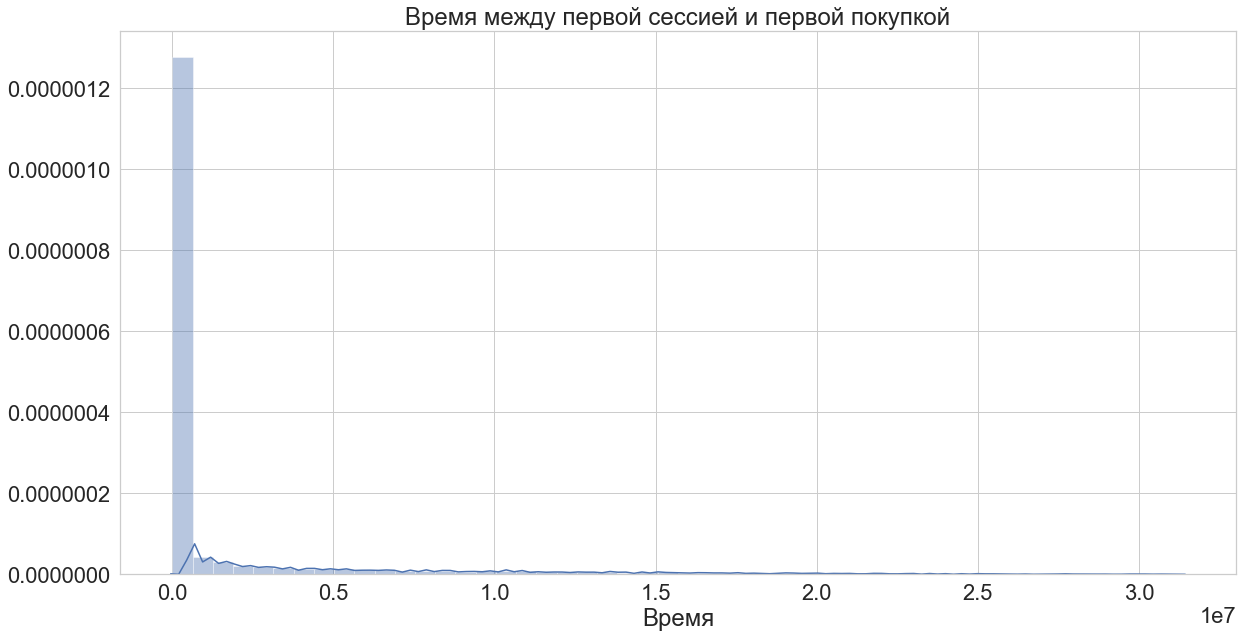

In [48]:
plt.subplots(figsize = (20, 10))
sns.distplot(first_buying_activity['order_time'].astype('timedelta64[s]'))
plt.title('Время между первой сессией и первой покупкой')
plt.xlabel('Время')
plt.show()

In [49]:
first_buying_activity['order_time'].value_counts().head(20)

00:01:00    2655
00:00:00    2451
00:02:00    2097
00:03:00    1684
00:04:00    1459
00:05:00    1204
00:06:00    1077
00:07:00     969
00:08:00     793
00:09:00     742
00:10:00     596
00:11:00     531
00:12:00     529
00:13:00     438
00:14:00     391
00:15:00     361
00:16:00     346
00:17:00     303
00:19:00     279
00:18:00     272
Name: order_time, dtype: int64

In [50]:
first_buying_activity['order_time'].describe()

count                      36509
mean     16 days 22:00:42.410364
std      47 days 02:16:55.368087
min              0 days 00:00:00
25%              0 days 00:04:00
50%              0 days 00:16:00
75%              2 days 00:22:00
max            363 days 07:04:00
Name: order_time, dtype: object

### Вывод

Чаще всего люди справляются с оформлением заказа примерно за минуту или даже быстрее. Это очень хороший результат, значит форма заказа достаточно понятная и удобная. Половине покупателей нужно менее 16 минут, чтобы закончить покупку. Однако это касается скорее всего тех юзеров, которые уже точно знали, на какое мероприятие они хотят купить билет. Тем же, кто попал в Яндекс.Афишу впервые перейдя по ссылке из любопытства, требуется больше времени, чтобы решиться на первую покупку.

### Количество покупок за день, неделю, месяц

In [51]:
#создадим столбцы с датой, годом, месяцем и неделей
orders_log['session_year']  = orders_log['buy_ts'].dt.year
orders_log['session_month'] = orders_log['buy_ts'].dt.month
orders_log['session_week']  = orders_log['buy_ts'].dt.week
orders_log['session_date'] = orders_log['buy_ts'].dt.date

In [52]:
#избавимся от одной строчки с седьмым рекламным источником. 
#Такого индификатора всё равно нет в таблице costs и дальше эта строчка нам будет только мешаться
orders_log = orders_log[orders_log['first_click_source_id'] != 7]

#избавимся ещё от одной строчики, где покупка была совершена в июне
orders_log = orders_log[orders_log['buy_ts'] < '2018-06-01']

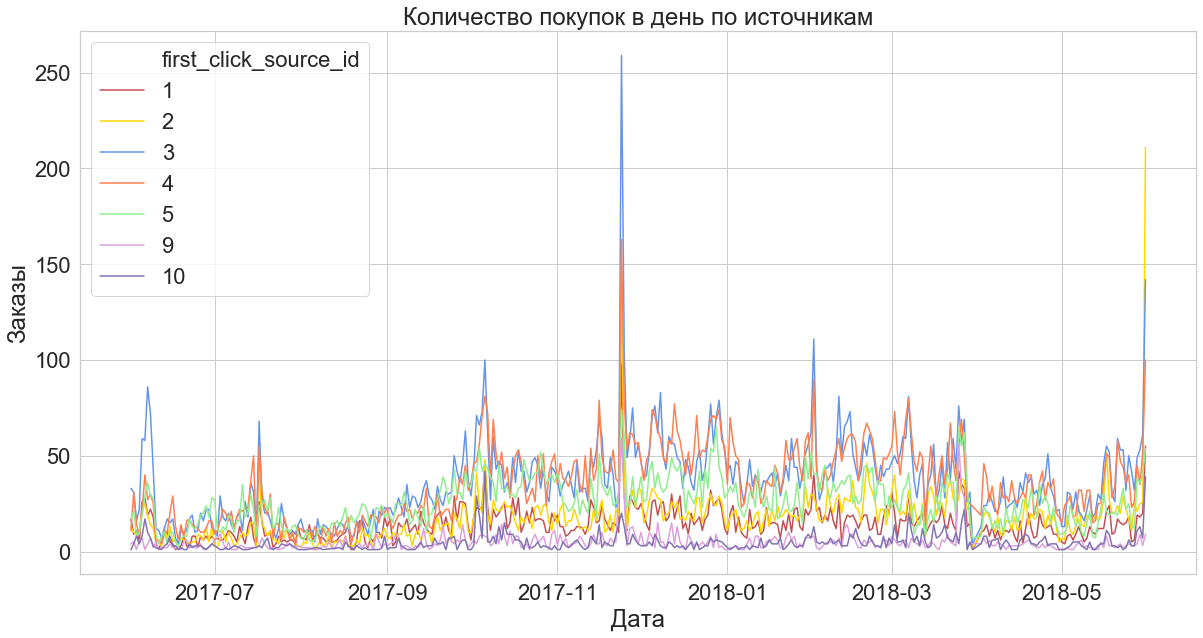

In [53]:
#посмотрим на количество покупок в день с разбивкой по источникам
orders_per_day_sources = orders_log.groupby(['session_date', 'first_click_source_id']).agg({'uid': 'count'}).reset_index()
sns.set(style='whitegrid', font_scale=2)
plt.subplots(figsize = (20, 10))
sns.lineplot(x='session_date', y='uid', hue='first_click_source_id', palette = {1 : 'r', 2 : 'gold', 3: 'cornflowerblue', 4 : 'coral', 5: 'lightgreen', 9 : 'plum', 10: 'm'}, data = orders_per_day_sources, legend = 'full')
plt.title('Количество покупок в день по источникам')
plt.ylabel('Заказы')
plt.xlabel('Дата')
plt.show()

In [54]:
print('Среднее количество покупок в день за последний год:', int(orders_log.groupby('session_date').agg({'uid': 'count'}).mean()))
print('Средняя выручка в день за последний год:', int(orders_log.groupby('session_date').agg({'revenue': 'sum'}).mean()))

Среднее количество покупок в день за последний год: 138
Средняя выручка в день за последний год: 694


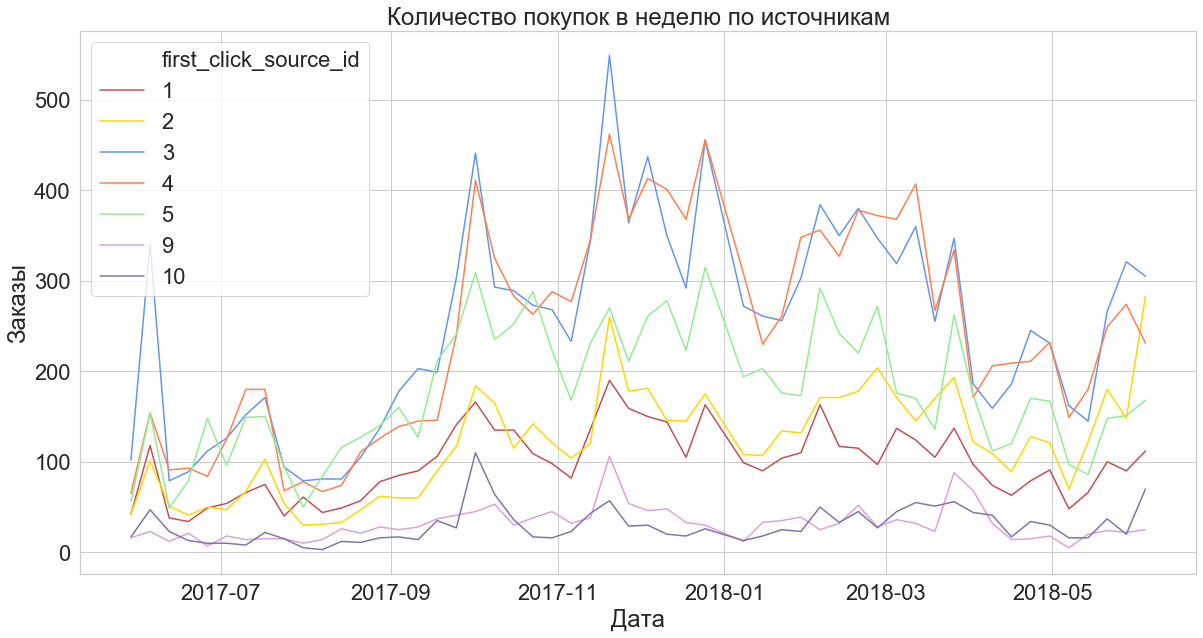

In [55]:
#посмотрим на количество покупок в неделю по источникам
orders_per_week_sources = orders_log.groupby(['session_year', 'session_week', 'first_click_source_id']).agg({'uid': 'count'}).reset_index()
#создадим столбец, куда запишем год и неделю
orders_per_week_sources['week_yr'] = pd.to_datetime(orders_per_week_sources['session_year'].astype(str) + ' ' + orders_per_week_sources['session_week'].astype(str) + ' 1',
                                format='%Y %U %w')
sns.set(style='whitegrid', font_scale=2)
plt.subplots(figsize = (20, 10))
sns.lineplot(x='week_yr', y='uid', hue = 'first_click_source_id', palette = {1 : 'r', 2 : 'gold', 3: 'cornflowerblue', 4 : 'coral', 5: 'lightgreen', 9 : 'plum', 10: 'm'}, data = orders_per_week_sources, legend= 'full')
plt.title('Количество покупок в неделю по источникам')
plt.ylabel('Заказы')
plt.xlabel('Дата')
plt.show()

In [56]:
print('Среднее количество покупок в неделю за последний год', int(orders_log.groupby(['session_year', 'session_week']).agg({'uid': 'count'}).mean()))
print('Средняя выручка в неделю за последний год', int(orders_log.groupby(['session_year', 'session_week']).agg({'revenue': 'sum'}).mean()))

Среднее количество покупок в неделю за последний год 950
Средняя выручка в неделю за последний год 4755


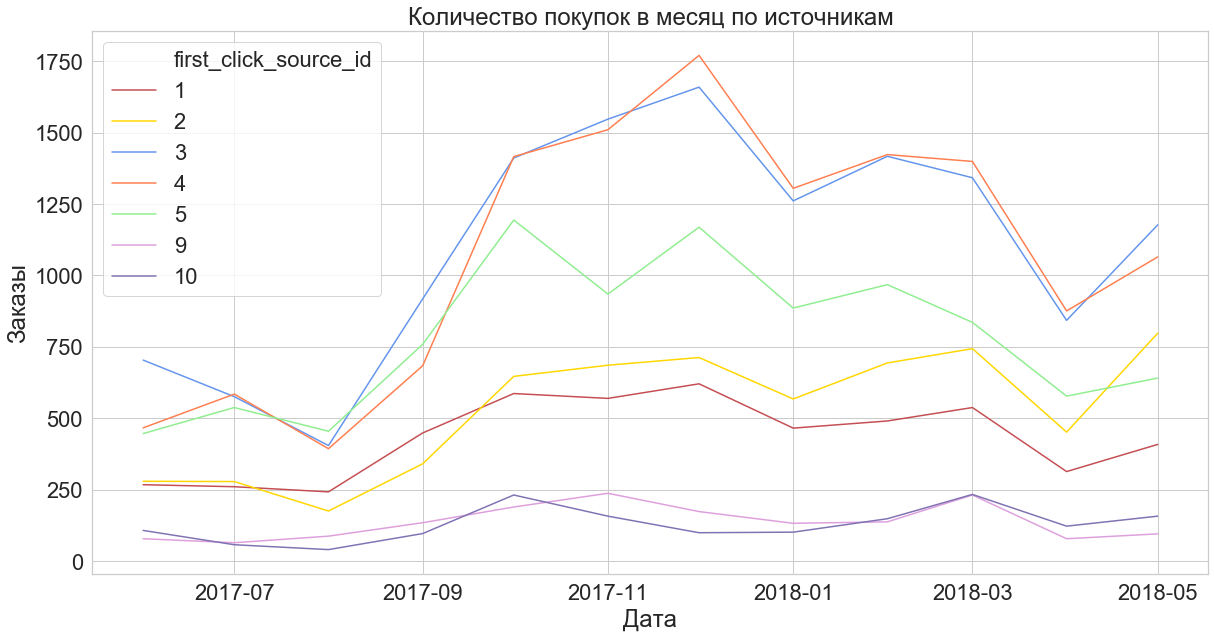

In [57]:
#посмотрим на количество заказов в месяц с разбивкой на источники
orders_per_month = orders_log.groupby(['session_year', 'session_month', 'first_click_source_id']).agg({'uid': 'count'}).reset_index()
#создадим столбец, куда запишем год и месяц
orders_per_month['month_yr'] = pd.to_datetime(orders_per_month['session_year'].astype(str) + ' ' + orders_per_month['session_month'].astype(str),
                                format='%Y %m')
sns.set(style='whitegrid', font_scale=2)
plt.subplots(figsize = (20, 10))
sns.lineplot(x='month_yr', y='uid', hue = 'first_click_source_id', palette = {1 : 'r', 2 : 'gold', 3: 'cornflowerblue', 4 : 'coral', 5: 'lightgreen', 9 : 'plum', 10: 'm'}, data = orders_per_month, legend= 'full')
plt.title('Количество покупок в месяц по источникам')
plt.ylabel('Заказы')
plt.xlabel('Дата')
plt.show()

In [58]:
print('Среднее количество покупок в месяц за последний год', int(orders_log.groupby(['session_year', 'session_month']).agg({'uid': 'count'}).mean()))
print('Средняя выручка в месяц за последний год', int(orders_log.groupby(['session_year', 'session_month']).agg({'revenue': 'sum'}).mean()))

Среднее количество покупок в месяц за последний год 4196
Средняя выручка в месяц за последний год 21004


### Вывод

Количество покупок заметно увеличивается осенью и зимой. Отчасти повышение спроса связано с сезонностью, ведь в холодные месяцы люди охотнее проводят досуг внутри помещений, а значит покупают билеты в театр, кино и на прочие мероприятия. Интересно, чем вызвано падение спроса в конце апреля, начале мая. 

### Средний чек в день, неделю, месяц

In [59]:
#cредний чек в день
average_check_per_day = orders_log.groupby(['session_date', 'first_click_source_id']).agg({'revenue': 'sum', 'uid': 'count'}).reset_index()
average_check_per_day['average_check'] = (average_check_per_day['revenue'] / average_check_per_day['uid'])

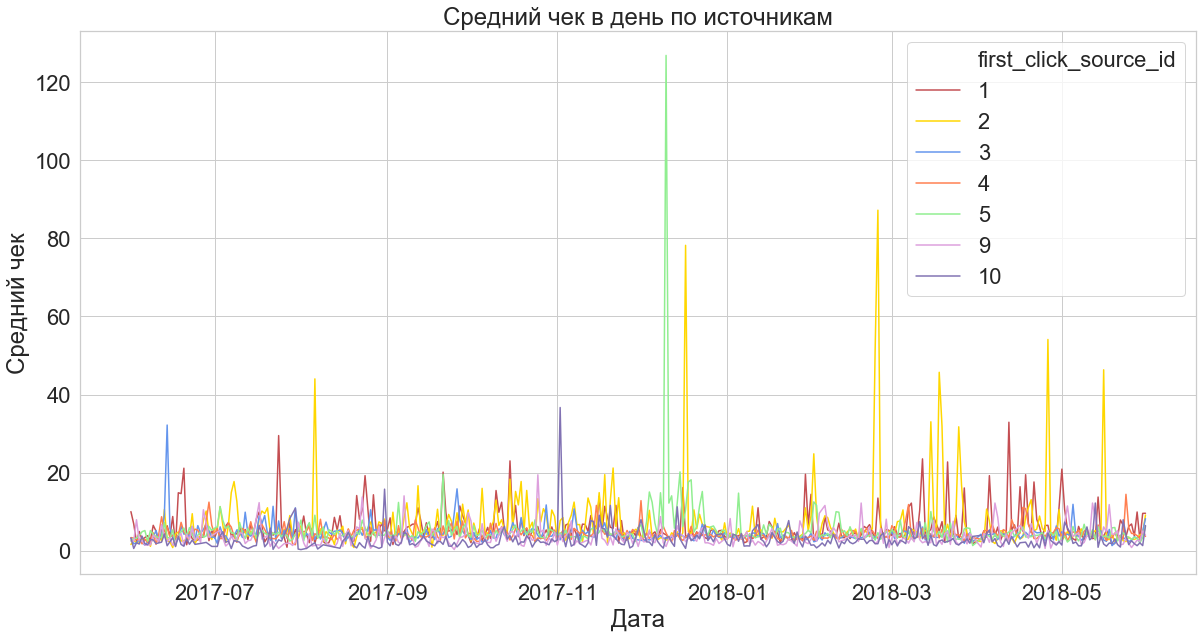

In [60]:
sns.set(style='whitegrid', font_scale=2)
plt.subplots(figsize = (20, 10))
sns.lineplot(x='session_date', y='average_check', hue = 'first_click_source_id', palette = {1 : 'r', 2 : 'gold', 3: 'cornflowerblue', 4 : 'coral', 5: 'lightgreen', 9 : 'plum', 10: 'm'}, data = average_check_per_day, legend= 'full')
plt.title('Средний чек в день по источникам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

In [61]:
#посмотрим что это за пик в декабре у пятого источника
average_check = orders_log[orders_log['first_click_source_id'] == 5].groupby('session_date').agg({'revenue': 'sum', 'uid': 'count'}).reset_index()
average_check['average_check'] = (average_check['revenue'] / average_check['uid'])
average_check.sort_values(by='average_check', ascending=False).head(3)

session_date  revenue  uid  average_check
192   2017-12-10  4184.67   33     126.808182
197   2017-12-15   908.73   45      20.194000
112   2017-09-21   763.50   39      19.576923

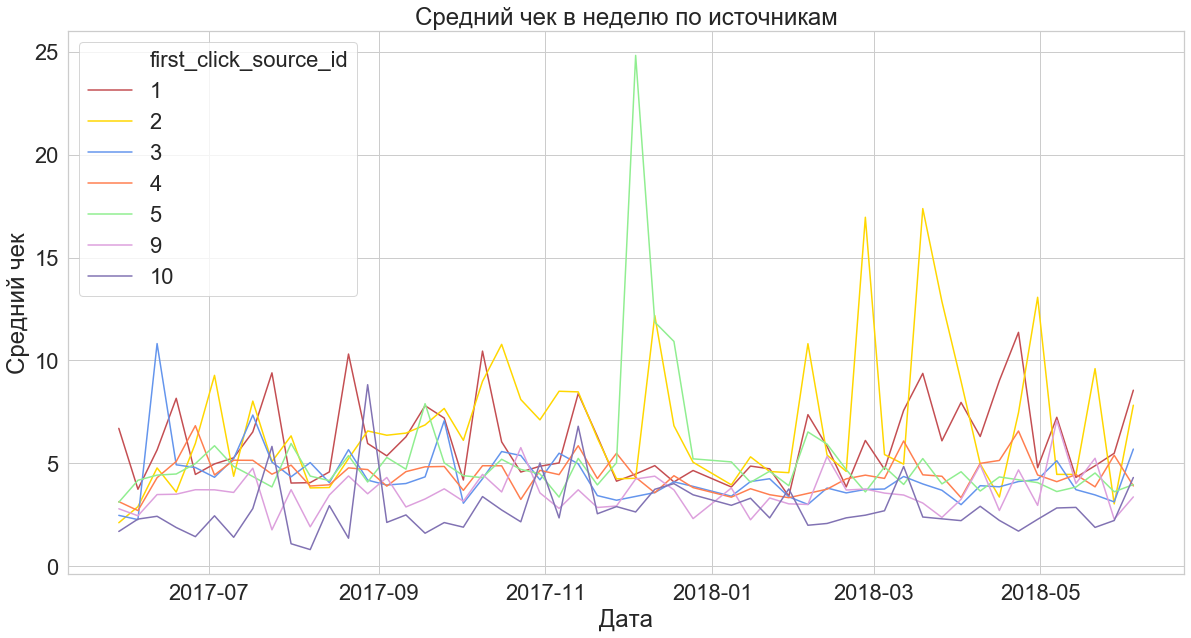

In [62]:
#Средний чек в неделю
average_check_per_week = orders_log.groupby(['session_year', 'session_week', 'first_click_source_id']).agg({'revenue': 'sum', 'uid': 'count'}).reset_index()
average_check_per_week['average_check'] = (average_check_per_week['revenue'] / average_check_per_week['uid'])
average_check_per_week['week_yr'] = pd.to_datetime(average_check_per_week['session_year'].astype(str) + ' ' + average_check_per_week['session_week'].astype(str) + ' 1',
                                format='%Y %U %w')
sns.set(style='whitegrid', font_scale=2)
plt.subplots(figsize = (20, 10))
sns.lineplot(x='week_yr', y='average_check', hue = 'first_click_source_id', palette = {1 : 'r', 2 : 'gold', 3: 'cornflowerblue', 4 : 'coral', 5: 'lightgreen', 9 : 'plum', 10: 'm'}, data = average_check_per_week, legend= 'full')
plt.title('Средний чек в неделю по источникам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

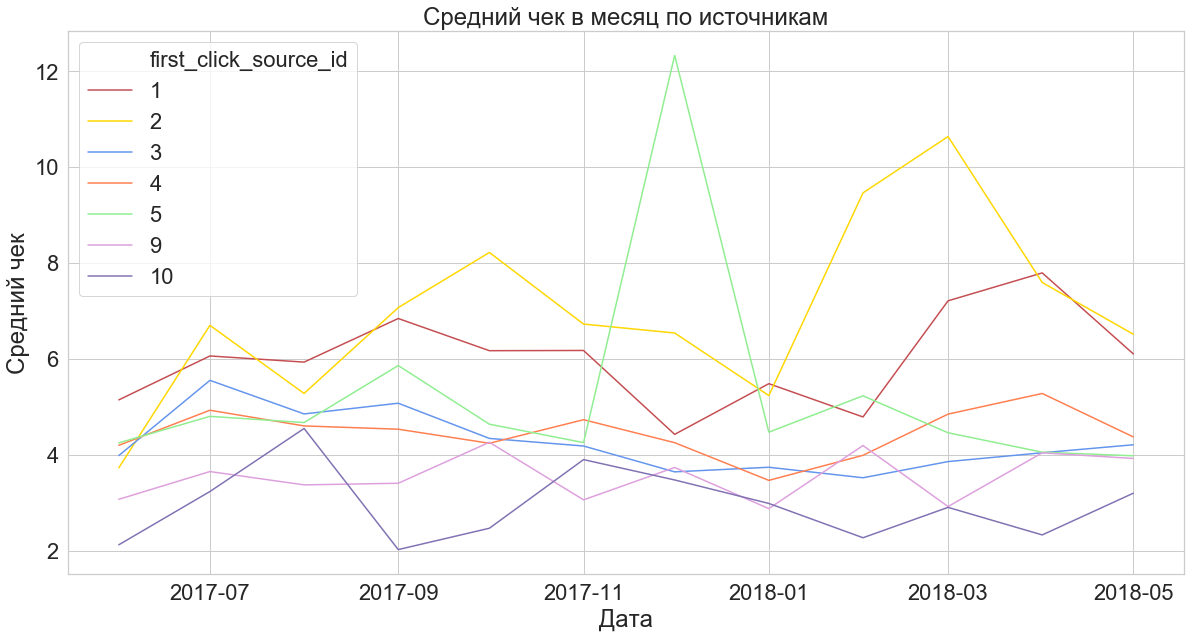

In [63]:
#Средний чек в месяц
average_check_per_month = orders_log.groupby(['session_year', 'session_month', 'first_click_source_id']).agg({'revenue': 'sum', 'uid': 'count'}).reset_index()
average_check_per_month['average_check'] = (average_check_per_month['revenue'] / average_check_per_month['uid'])
average_check_per_month['month_yr'] = pd.to_datetime(average_check_per_month['session_year'].astype(str) + ' ' + average_check_per_month['session_month'].astype(str),
                                format='%Y %m')
sns.set(style='whitegrid', font_scale=2)
plt.subplots(figsize = (20, 10))
sns.lineplot(x='month_yr', y='average_check', hue = 'first_click_source_id', palette = {1 : 'r', 2 : 'gold', 3: 'cornflowerblue', 4 : 'coral', 5: 'lightgreen', 9 : 'plum', 10: 'm'}, data = average_check_per_month, legend= 'full')
plt.title('Средний чек в месяц по источникам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.show()

In [64]:
print('Средний чек последний год:', round((orders_log['revenue'].sum() / orders_log['uid'].count()).mean(), 4))

Средний чек последний год: 5.0048


### Вывод

В среднем люди тратят около пяти условных единиц на покупку. 10 декабря средний чек из пятого источника был самый большой и стоставил 126 у.е. Может быть именно в этот день на Яндекс.Афише продавались эксклюзивные билеты на какие-то дорогие концерты или новогодние представления. Бывают высокие показатели у среднего чека пользователей сервиса, которые пришли из второго источника, но подъемы сменяются резкими спадами. Не смотря на то, что количество покупок в январе было достаточным, средний чек довольно маленький. Возможно это связано с промоакциями и большими посленовогодними скидками.

### Lifetime Value (LTV) с разбивкой по рекламным источникам

In [65]:
#получим месяц первой покупки каждого покупателя
orders_log['order_month'] = orders_log['buy_ts'].astype('datetime64[M]')

In [66]:
#напишем функцию для расчета ltv
def ltv(data, source_id):
    s_orders_log = data[data['first_click_source_id'] == source]
    #получим месяц первой покупки каждого покупателя
    first_orders = s_orders_log.groupby('uid').agg({'order_month': 'min'}).reset_index()
    first_orders.columns = ['uid', 'first_order_month']
    #посчитаем количество новых покупателей (n_buyers) за каждый месяц
    cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes.columns = ['first_order_month', 'n_buyers']
    new_orders_log = pd.merge(s_orders_log,first_orders, on='uid')
    order_cohorts = new_orders_log.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
    ltv_report = pd.merge(cohort_sizes, order_cohorts, on='first_order_month')
    ltv_report['cohorts_age'] = (ltv_report['order_month'] - ltv_report['first_order_month']) / np.timedelta64(1, 'M')
    ltv_report['cohorts_age'] = ltv_report['cohorts_age'].round().astype('int')
    #так как у нас нет возможности посчитать маржинальность, то для расчёта LTV будем использовать показатели выручки
    ltv_report['ltv'] = ltv_report['revenue'] / ltv_report['n_buyers']
    ltv_report['first_order_month'] = ltv_report['first_order_month'].dt.strftime('%Y-%m')
    return ltv_report

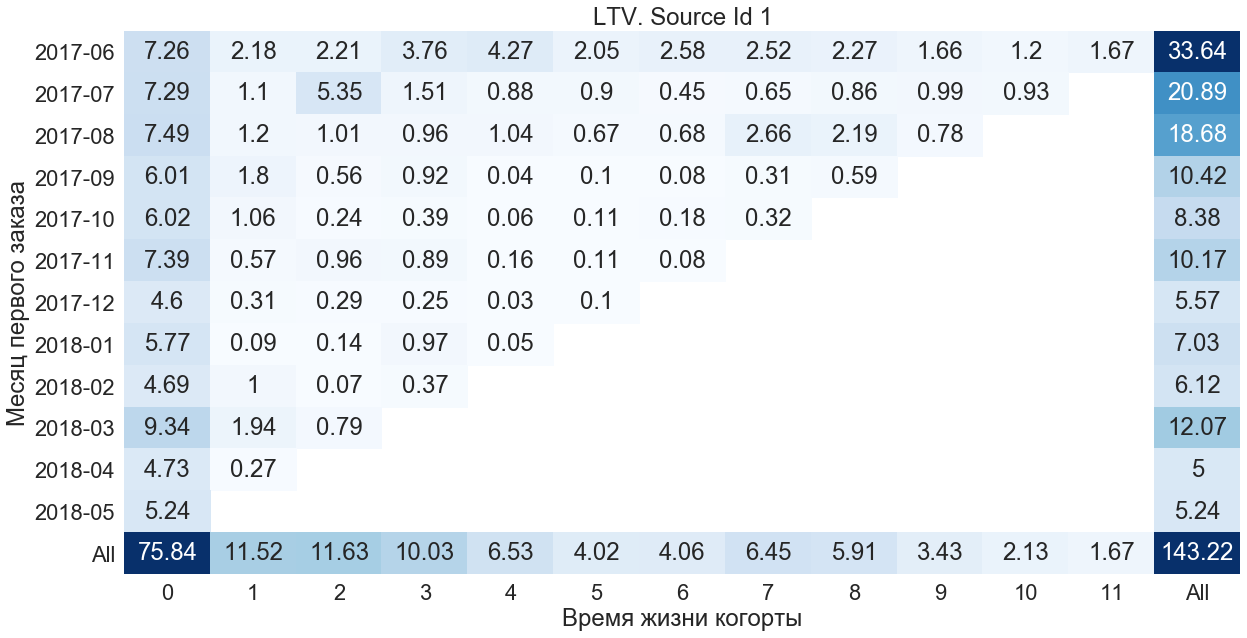

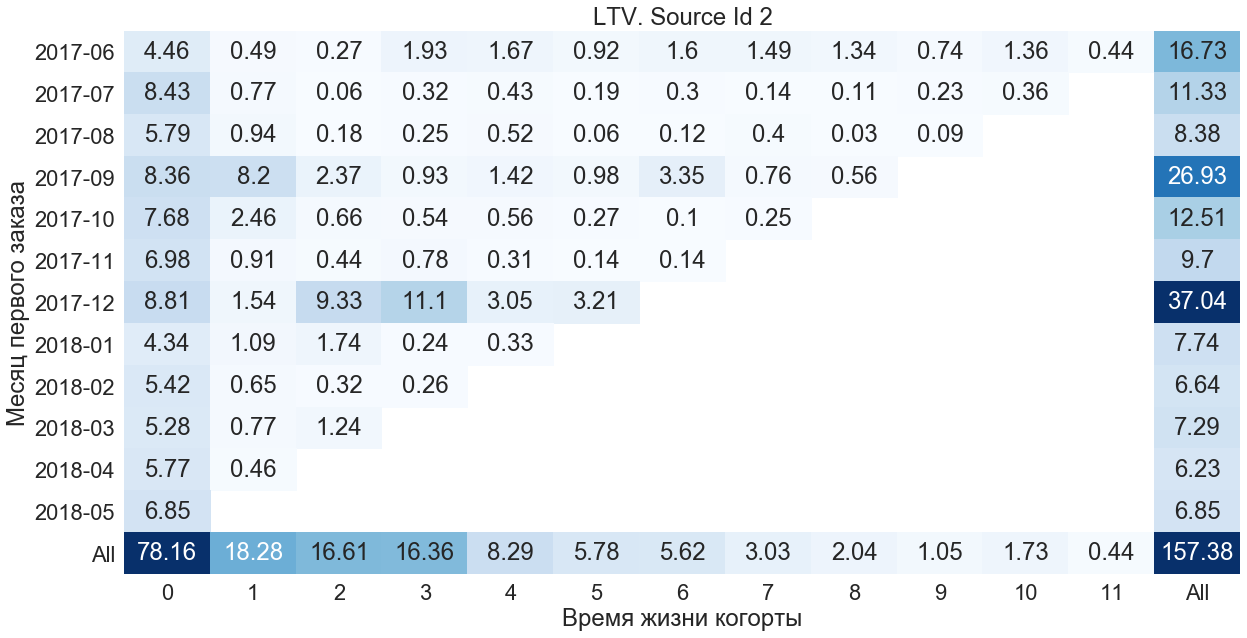

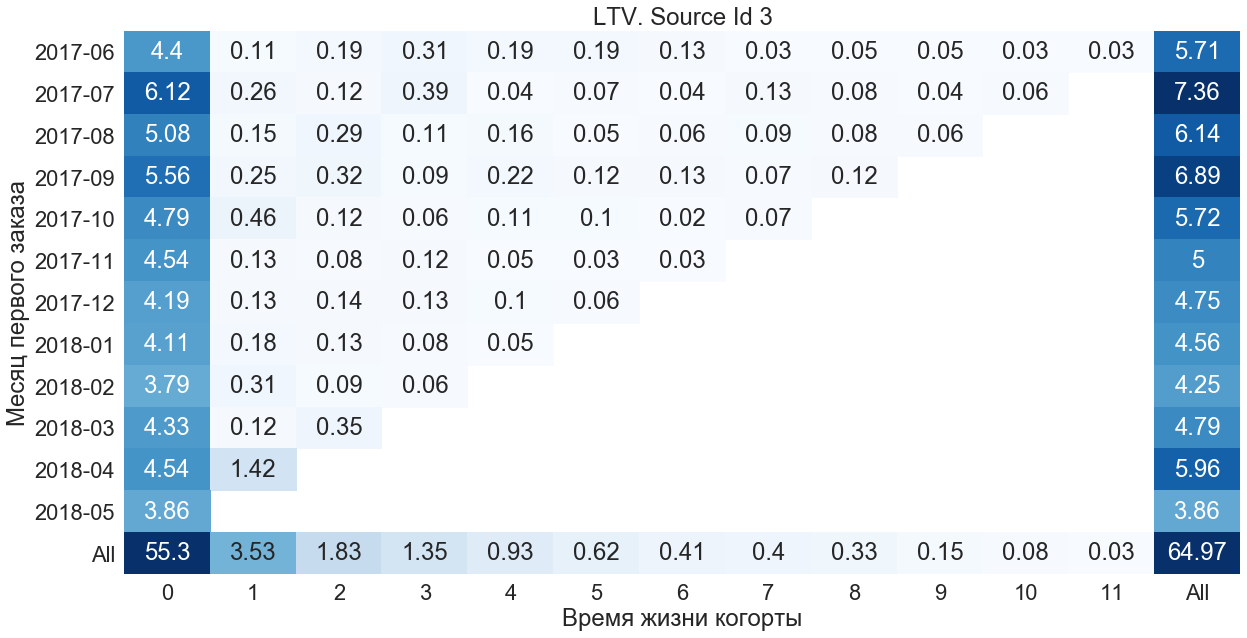

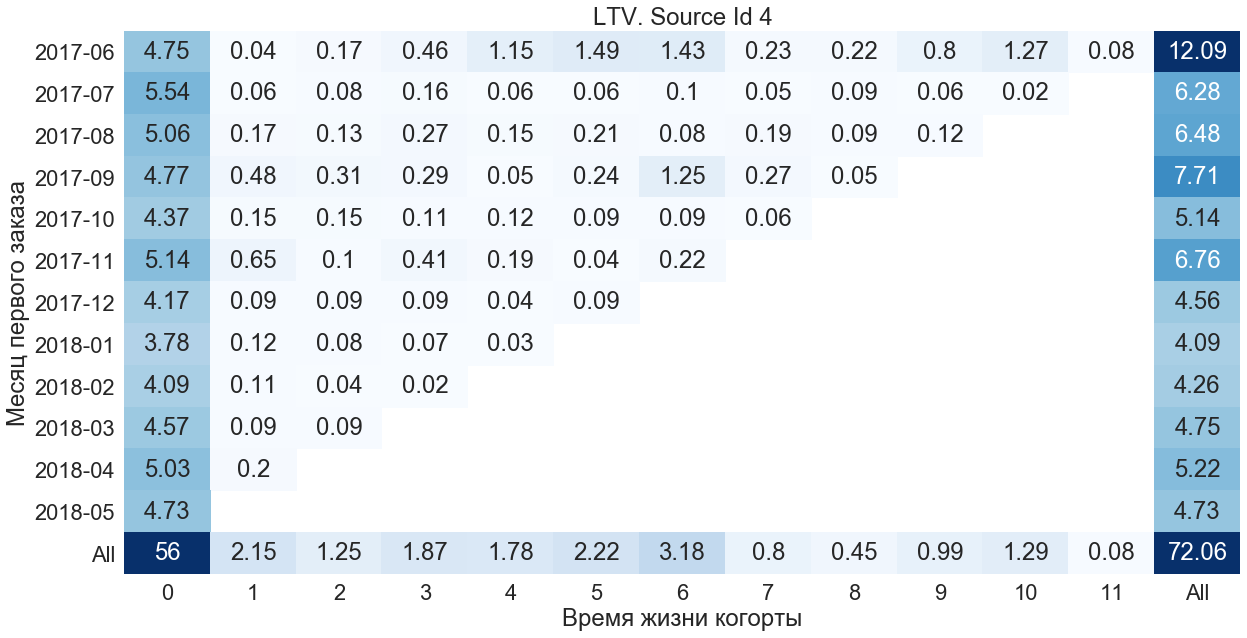

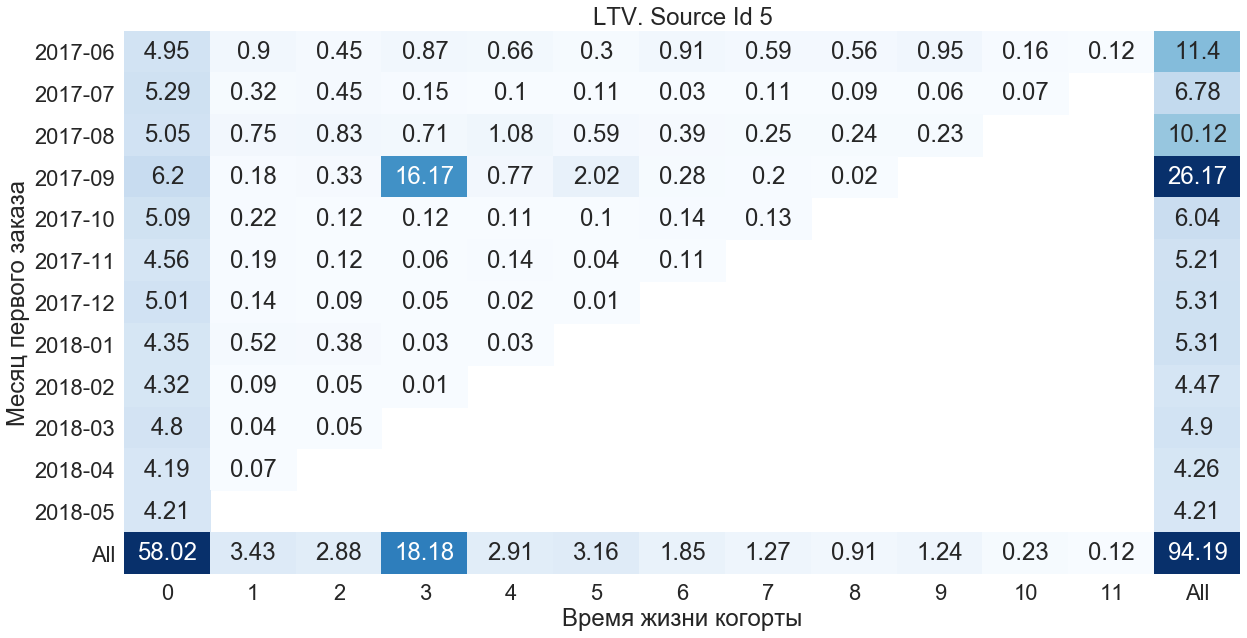

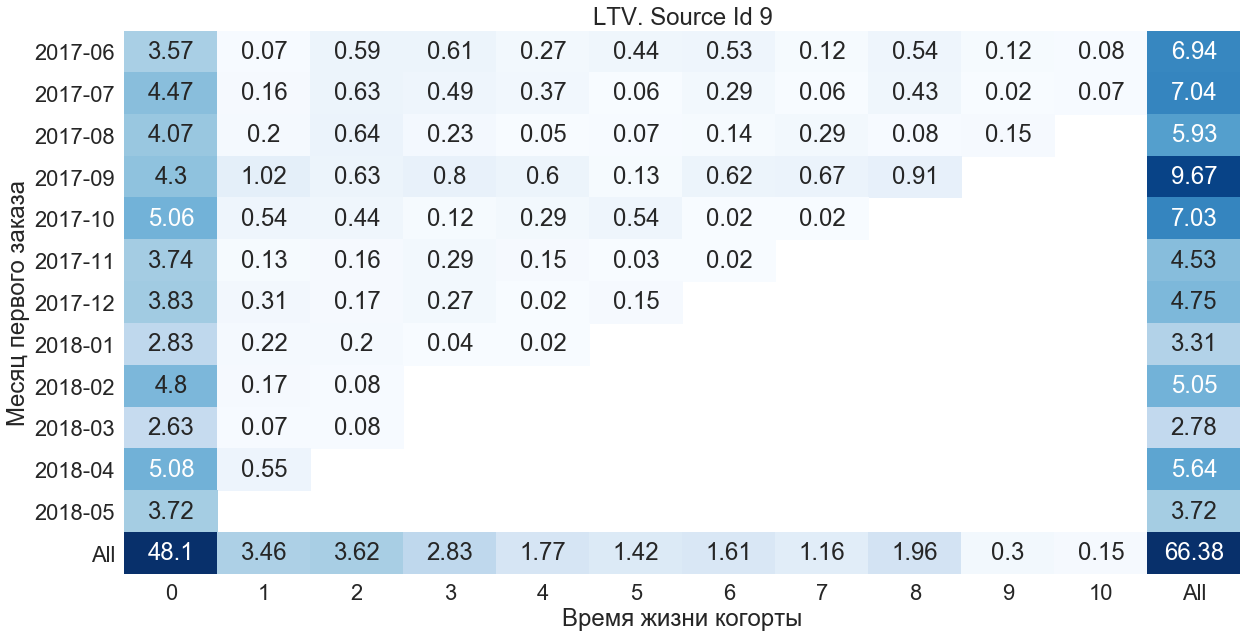

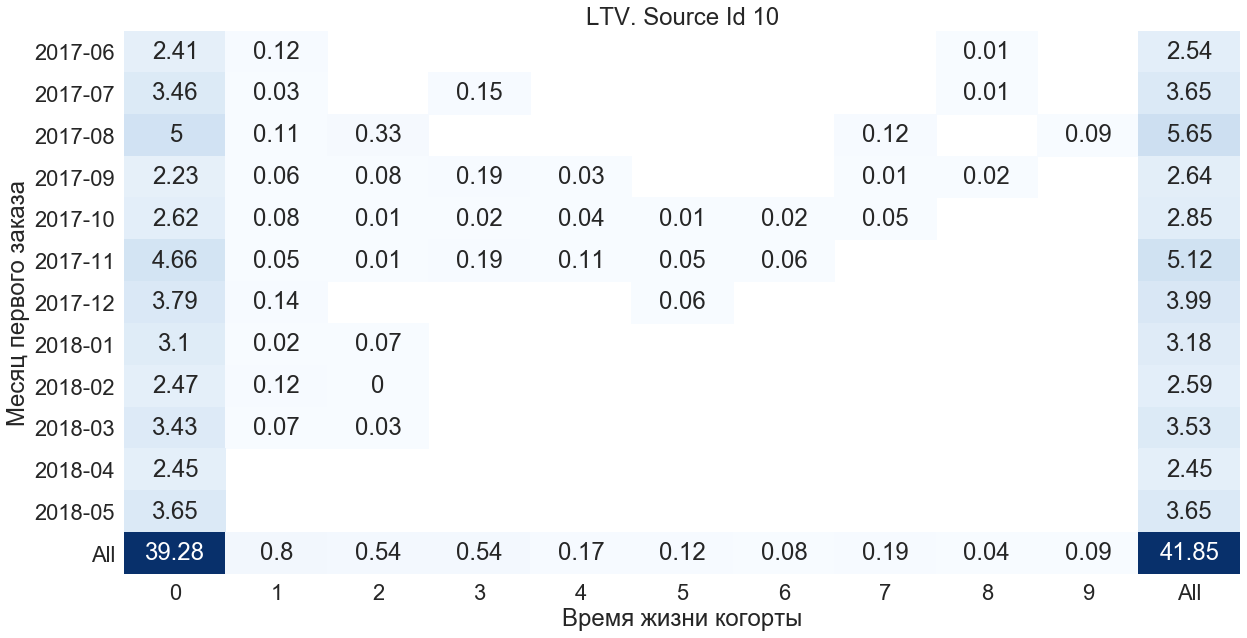

In [67]:
for source in sources:
    ltv_report = ltv(orders_log, source)
    ltv_output = ltv_report.pivot_table(
            index='first_order_month', 
            columns='cohorts_age', 
            values='ltv', 
            aggfunc='sum', margins=True).round(2)
     
    plt.subplots(figsize = (20, 10))
    sns.heatmap(ltv_output, robust=True, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('LTV. Source Id ' + str(source))
    plt.xlabel('Время жизни когорты')
    plt.ylabel('Месяц первого заказа')

### Сравнение когорт

LTV удобно считать по когортам, однако для корректного сравнения у когорт должен быть одинаковый возраст. Поэтому ограничим здесь наше исследование семью когортами 2017 года, потому что они уже успели прожить минимум полгода, учтем только период в шесть месяцев. 

In [68]:
ltv_2017 = pd.DataFrame(ltv_output.index).query('first_order_month < "2018-01"')

In [69]:
for source in sources:
    ltv_report = ltv(orders_log, source)
    filtered_report = ltv_report.query('first_order_month < "2018-01" and cohorts_age < 6')
    filtered_output = filtered_report.pivot_table(
            index='first_order_month',
            values='ltv', 
            aggfunc='sum').round(2)
    ltv_2017 = ltv_2017.join(filtered_output, on='first_order_month', rsuffix = ' source ' + str(source))

In [70]:
ltv_2017.rename(columns={'ltv':'ltv source 1'}, inplace=True)
ltv_2017['total'] = ltv_2017.sum(axis=1)
#превратим столбец в индекс, чтобы можно было сделать тепловую карту
ltv_2017 = ltv_2017.set_index('first_order_month')

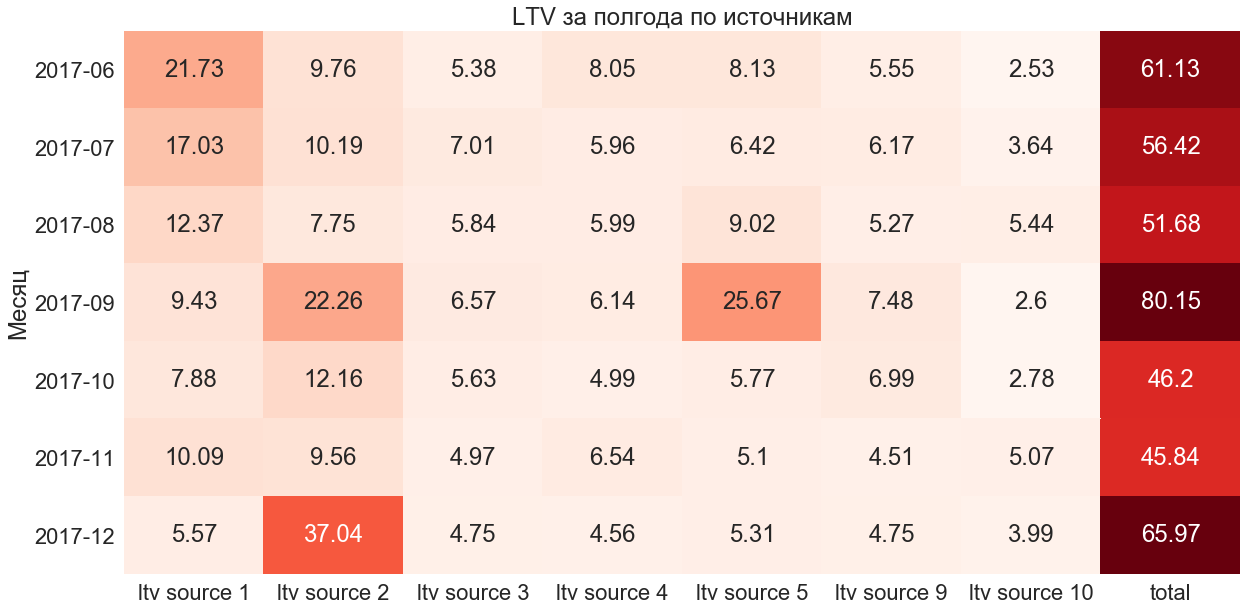

In [71]:
plt.subplots(figsize = (20, 10))
sns.heatmap(ltv_2017, robust=True, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.title('LTV за полгода по источникам')
plt.ylabel('Месяц')
plt.show()

Больше всех денег за свой недолгий шестимесячный период жизни принесла декабрьская когорта пришедшая из второго источника. Также прибыльными были сентябрьские когорты из второго и пятого рекламных источников. В целом у сентябрьской когорты лучшие показатели. Меньше всего ltv у летне-осенних когорт из десятого источника. 

### Вывод

Если смотреть на показатель Lifetime Value, то лучше всего себя показали источники номер 2 и номер 1. Итоговый LTV второго источника - 157, первого - 143. На графиках заметно, как падает LTV на второй месяц, нужно срочно что-то придумывать с удержанием клиентов. 

Есть некоторые всплески, которые следует изучить более пристально. Например, необходимо выяснить, что такое дорогое покупали клиенты, пришедшие из пятого источника в декабре. Эти высокие показатели сильно бросаются в глаза на всех графиках.

## <a id="par.3">Маркетинг</a>

### Потраченная сумма денег (всего / на каждый источник / по времени)

In [72]:
print('Всего за период с июня 2017 по конец мая 2018 года на маркетинг потрачено', costs['costs'].sum())

Всего за период с июня 2017 по конец мая 2018 года на маркетинг потрачено 329131.62


In [73]:
#посмотрим на разбивку по источникам
source_costs = costs.pivot_table(index = 'source_id', values = 'costs', aggfunc = 'sum').reset_index()
source_costs

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

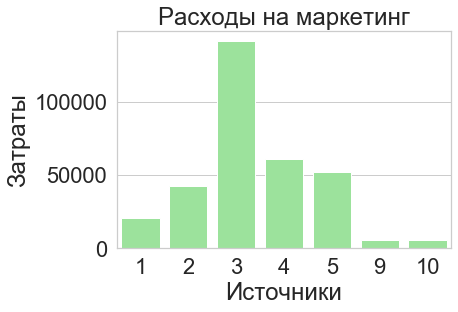

In [74]:
sns.barplot(x='source_id', y='costs', data=source_costs, color='lightgreen')
plt.title('Расходы на маркетинг')
plt.xlabel('Источники')
plt.ylabel('Затраты')
plt.show()

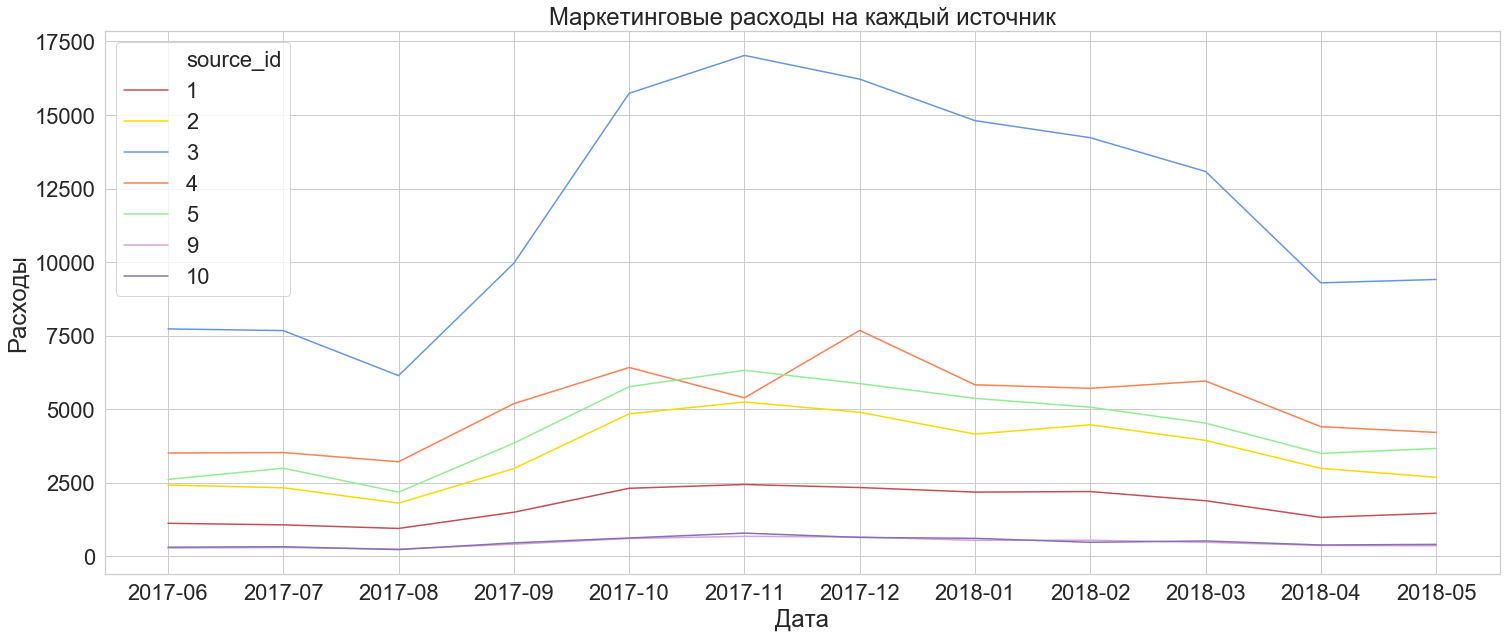

In [75]:
#посомтрим как изменялись со временем расходы на тот или иной источник на линейном графике
costs['dt_month'] = costs['dt'].dt.strftime('%Y-%m')
monthly_costs = costs.groupby(['dt_month', 'source_id'])['costs'].sum().reset_index()
plt.subplots(figsize = (25, 10))
sns.lineplot(x='dt_month', y='costs', hue = 'source_id',  palette = {1 : 'r', 2 : 'gold', 3: 'cornflowerblue', 4 : 'coral', 5: 'lightgreen', 9 : 'plum', 10: 'm'}, data = monthly_costs, legend= 'full')
plt.title('Маркетинговые расходы на каждый источник')
plt.ylabel('Расходы')
plt.xlabel('Дата')
plt.show()

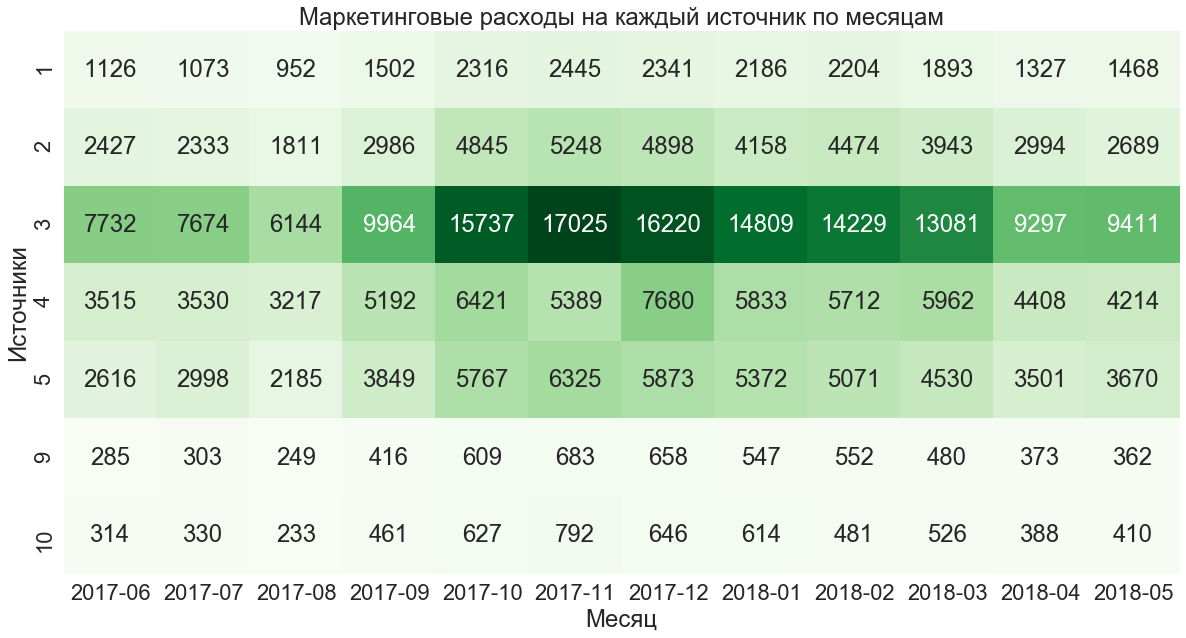

In [76]:
#а теперь та же метрика, но в цифрах на тепловой карте
month_costs = costs.pivot_table(index='source_id',
    columns='dt_month',
    values='costs',
    aggfunc='sum')
plt.subplots(figsize = (20, 10))
sns.heatmap(month_costs, annot=True, fmt='.0f', cmap='Greens', cbar=False)
plt.title('Маркетинговые расходы на каждый источник по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Источники')
plt.show()

### Вывод

Зимой маркетинговые расходы заметно увеличились у всех источников. Больше всего денег было потрачено на третий рекламный источник. Также активно вкладывались в 2, 4 и 5ый.

### Стоимость привлечения одного покупателя (САС)

In [77]:
#создадим пустой датасет с месяцами, чтобы к нему в цикле добавлять cac по источникам
cac_sources = pd.DataFrame(ltv_output.index).query('first_order_month <= "2018-05"')

In [78]:
for source in sources:
    ltv_report = ltv(orders_log, source) 
    s_costs = costs[costs['source_id'] == source]
    monthly_costs = s_costs.groupby('dt_month')['costs'].sum().reset_index()
    cac_report = pd.merge(ltv_report, monthly_costs, left_on='first_order_month', right_on='dt_month')
    cac_report['cac'] = cac_report['costs'] / cac_report['n_buyers']
    cac = cac_report.pivot_table(index='first_order_month', values='cac', aggfunc='mean').round(2)
    cac_sources = cac_sources.join(cac, on='first_order_month', rsuffix = ' source ' + str(source))   

In [79]:
cac_sources.rename(columns={'cac':'cac source 1'}, inplace=True)
#превратим столбец в индекс, чтобы можно было сделать тепловую карту
cac_sources = cac_sources.set_index('first_order_month')

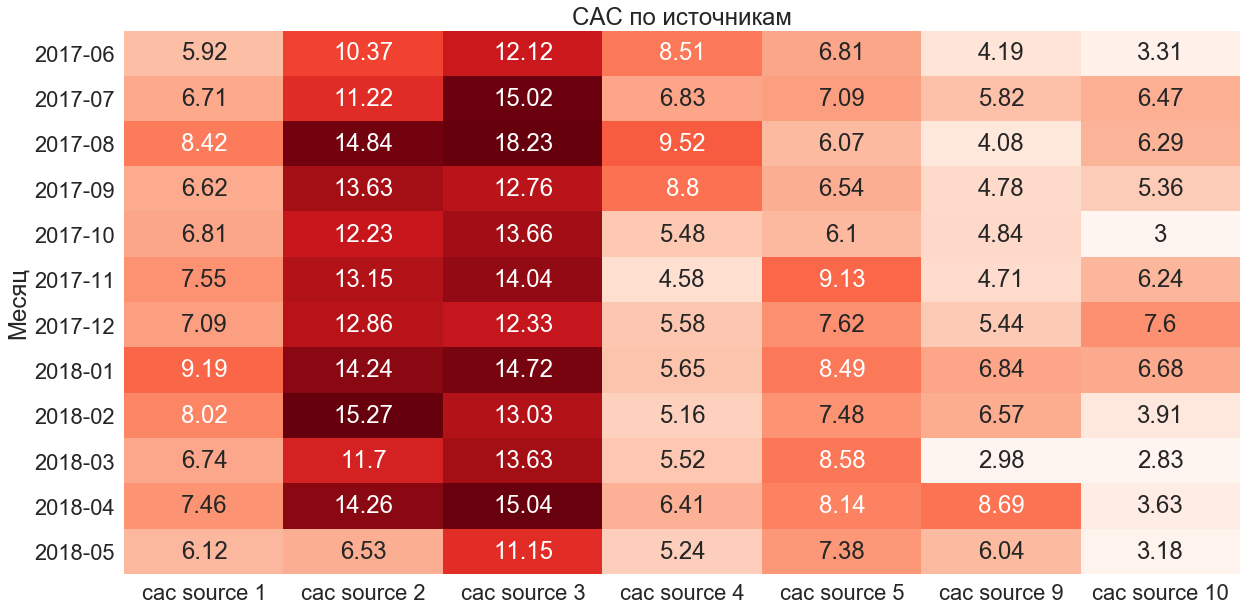

In [80]:
plt.subplots(figsize = (20, 10))
sns.heatmap(cac_sources, robust=True, annot=True, cmap='Reds', fmt='g', cbar=False)
plt.title('CAC по источникам')
plt.ylabel('Месяц')
plt.show()

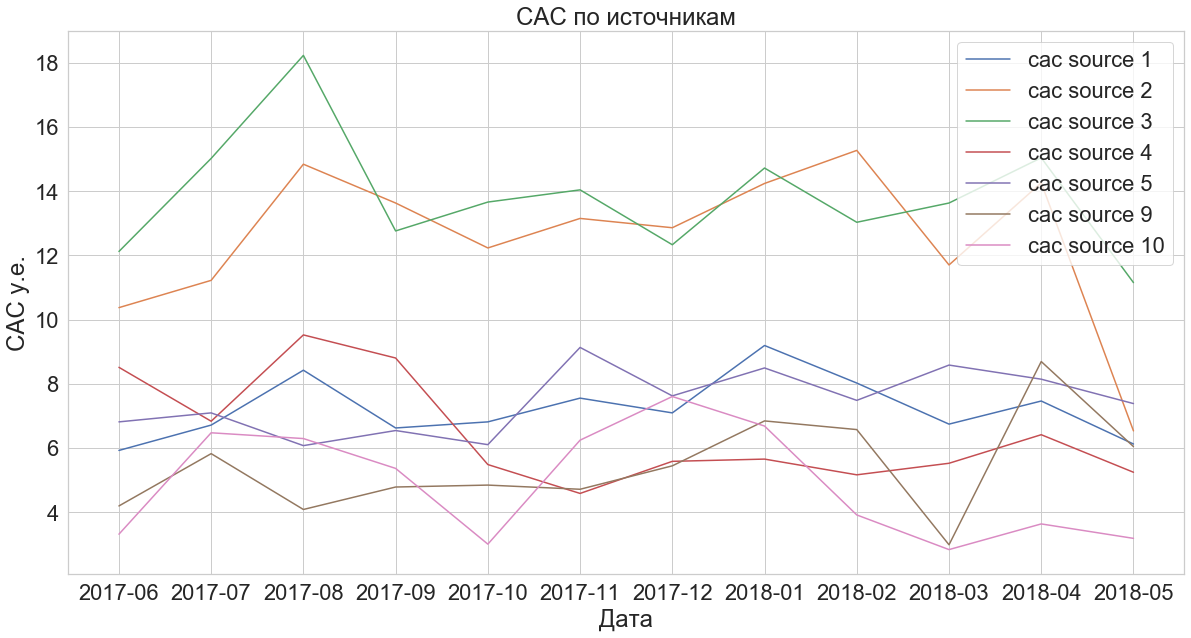

In [81]:
#то же самое, но на линейном графике
plt.subplots(figsize = (20, 10))
sns.lineplot(data = cac_sources, dashes=False)
plt.title('CAC по источникам')
plt.xlabel('Дата')
plt.ylabel('CAC у.е.')
plt.show()

### Вывод

Дороже всего обошлось привлечение из второго и третьего источников, в среднем по 12.5 и 13.8 у.е. на каждого покупателя соответственно, но в мае этот показатель начал снижаться. Дешевле всех компании обходятся клиенты из девятого и десятого источников, но мы помним, что клиенты из этих источников не очень активно совершают покупки. В целом по графику видно, что стоимость привлечения значительно выше, чем средний чек, посчитанный выше. Скорее всего инвестиции в маркетинг не окупаются. Для того чтобы подтвердить это предположение посчитаем ROI.

### Окупаемость инвестиций (ROI)

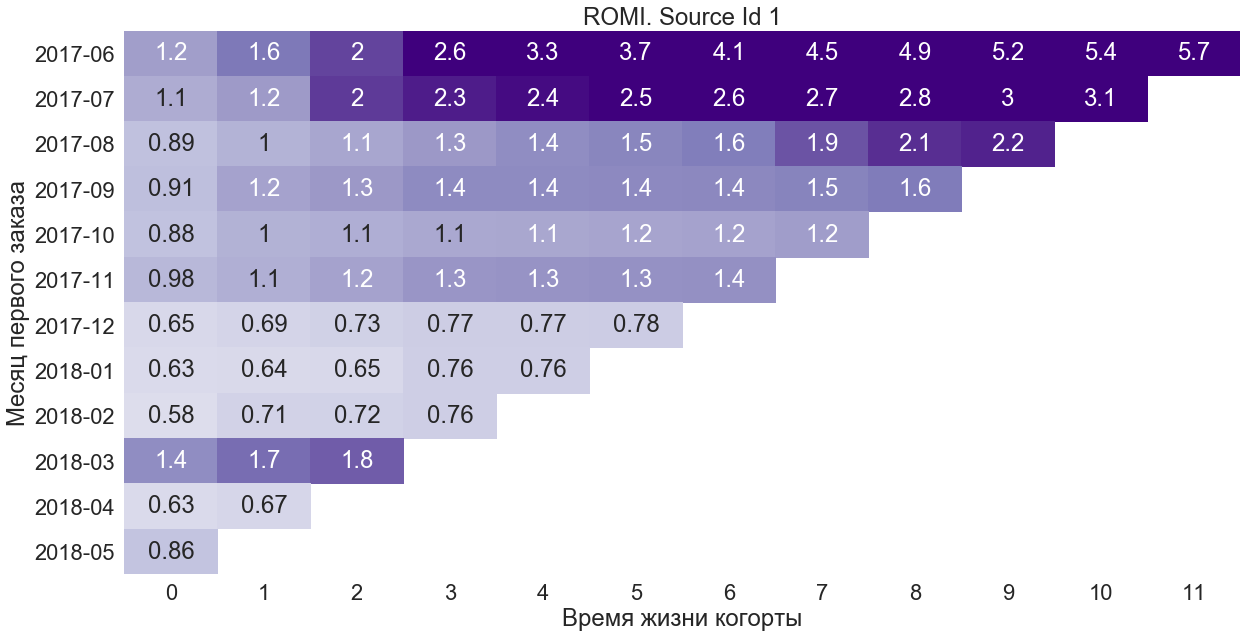

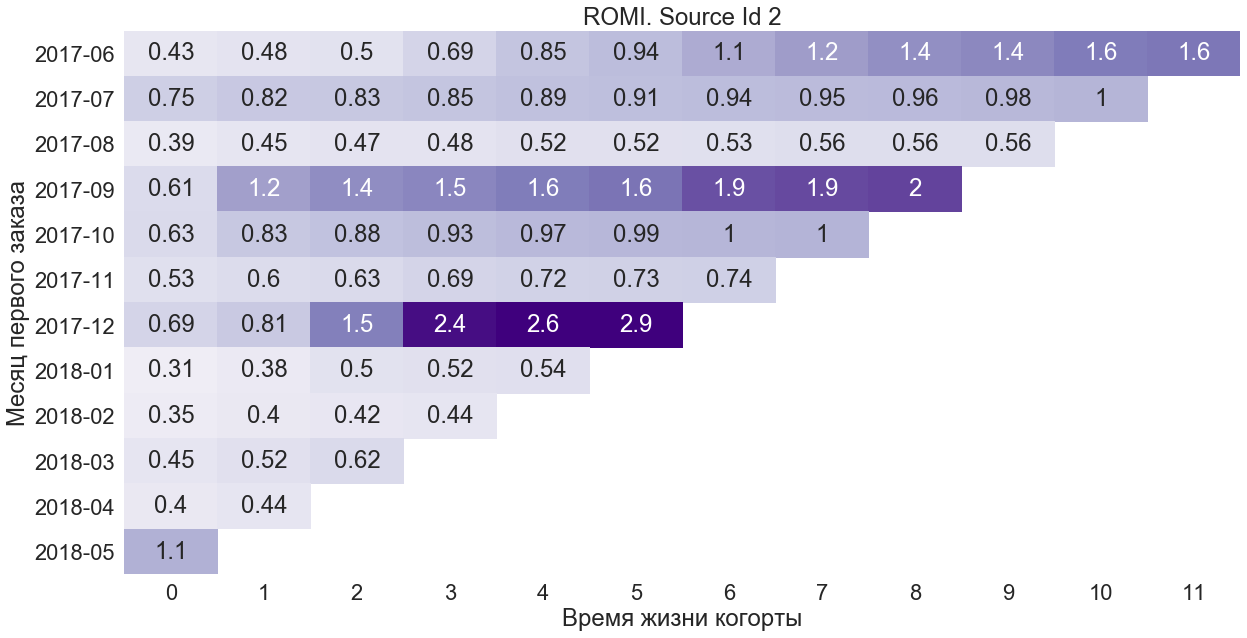

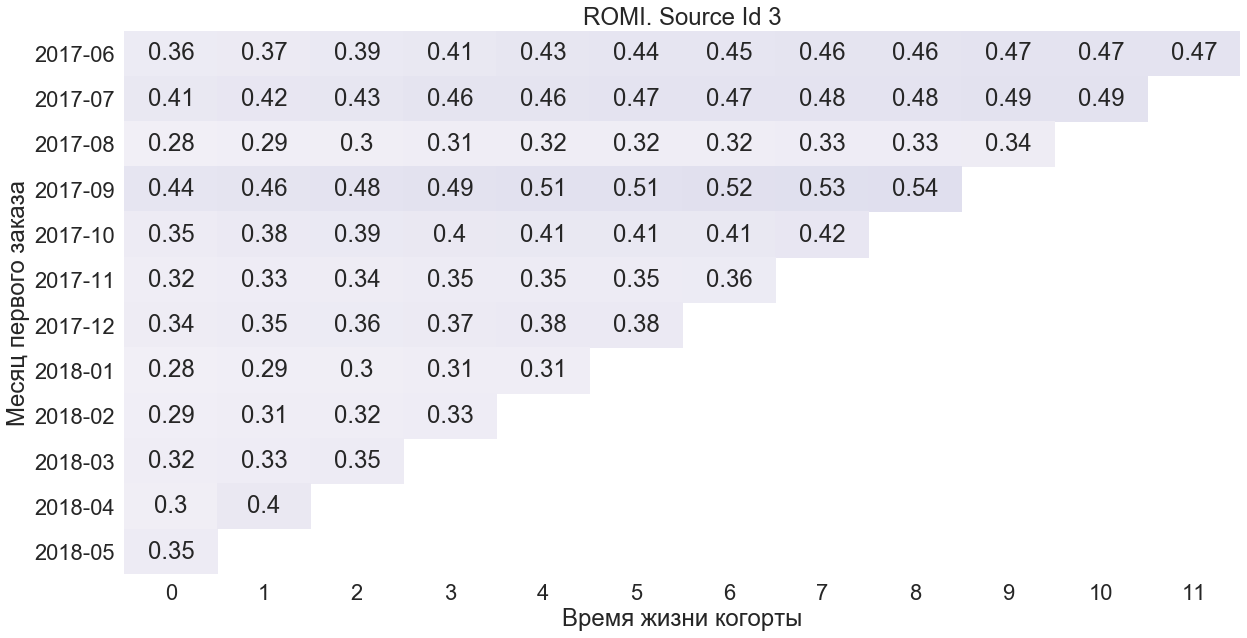

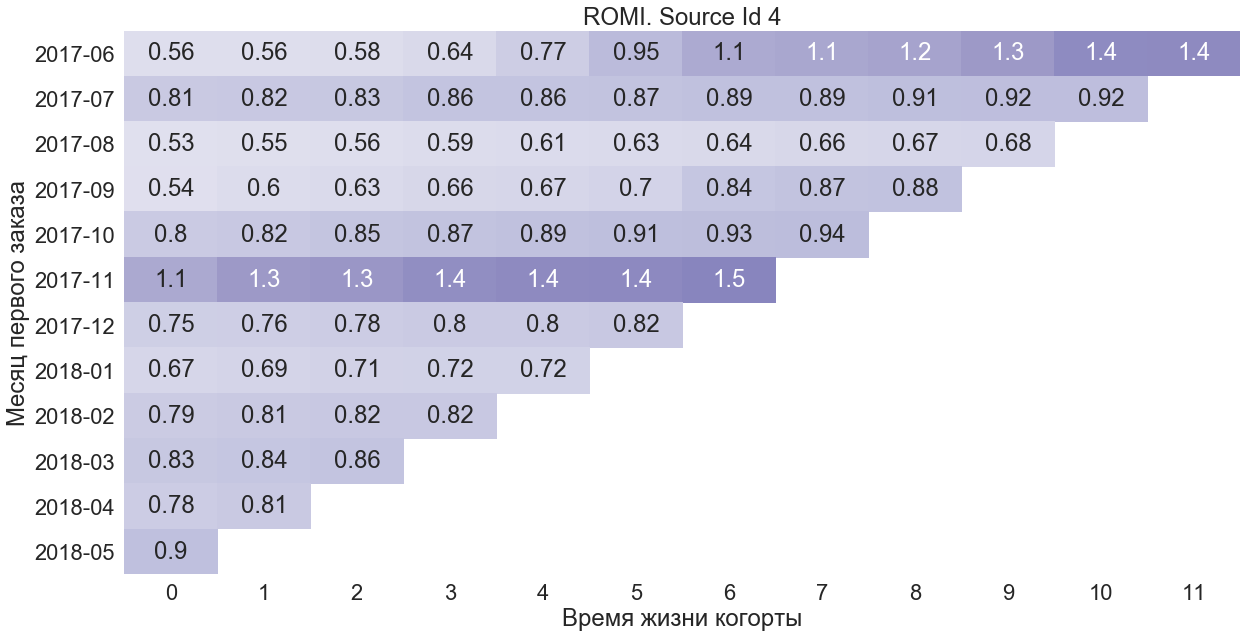

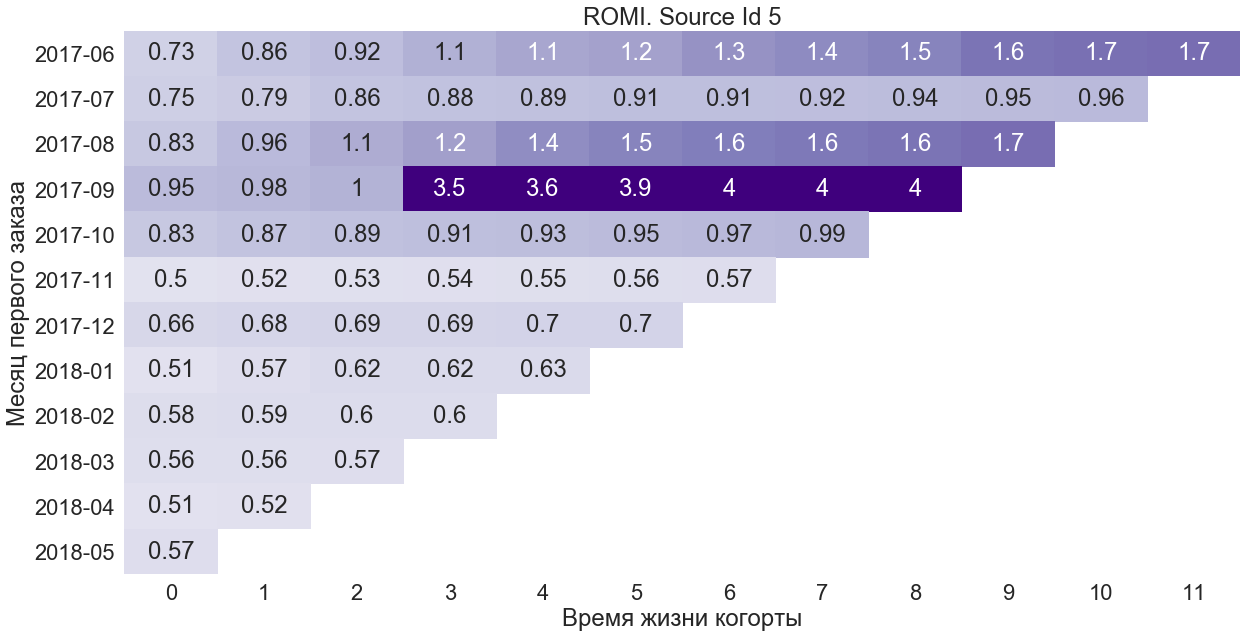

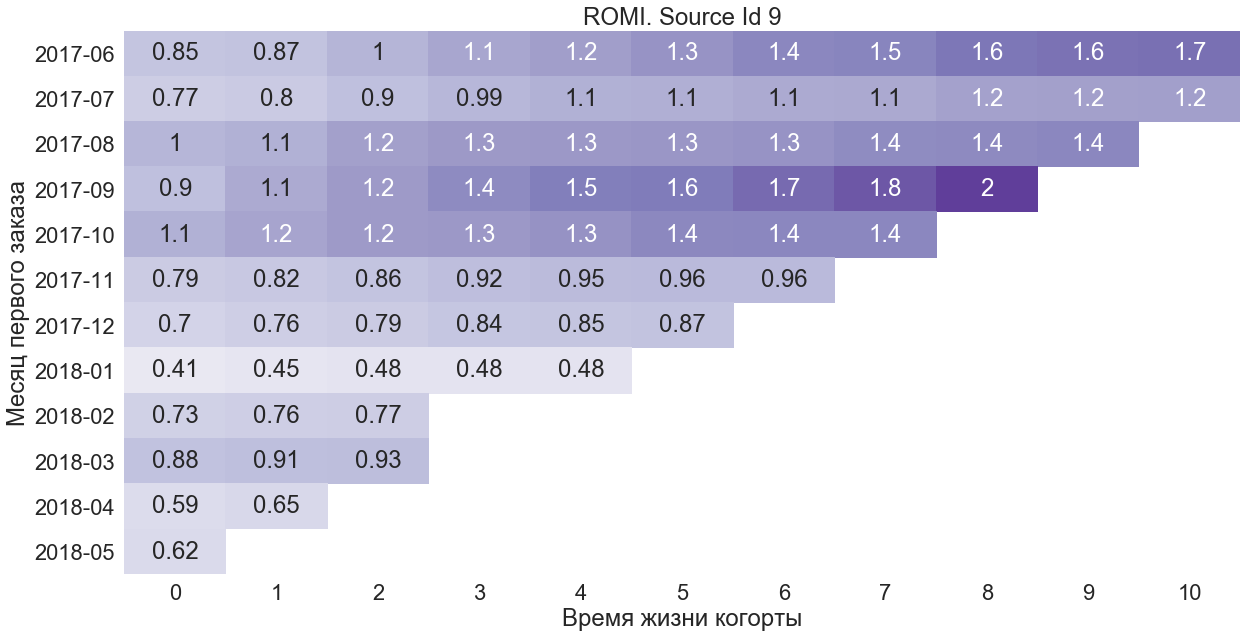

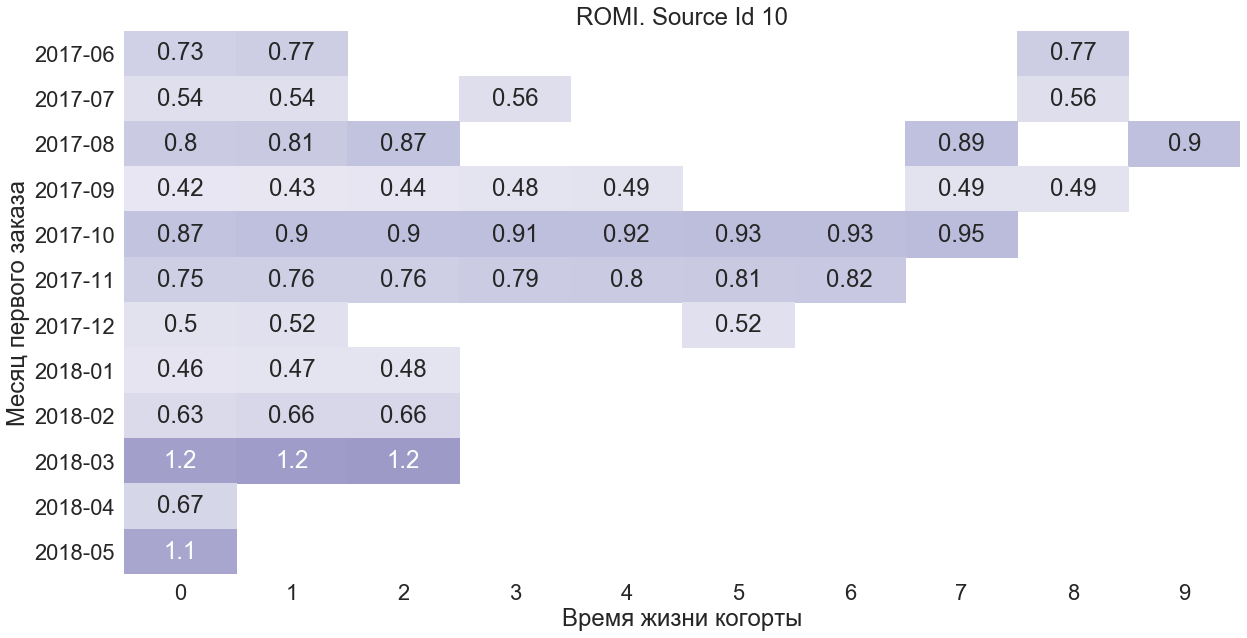

In [82]:
for source in sources:
    ltv_report = ltv(orders_log, source)
    s_costs = costs[costs['source_id'] == source]
    monthly_costs = s_costs.groupby('dt_month')['costs'].sum().reset_index()
    cac_report = pd.merge(ltv_report, monthly_costs, left_on='first_order_month', right_on='dt_month')
    cac_report['cac'] = cac_report['costs'] / cac_report['n_buyers']
    cac_report['romi'] = cac_report['ltv'] / cac_report['cac']
    output = cac_report.pivot_table(
        index='first_order_month', 
        columns='cohorts_age', 
        values='romi', 
        aggfunc='mean').cumsum(axis=1).round(2)

    plt.subplots(figsize = (20, 10))
    sns.heatmap(output, annot=True, cmap='Purples', vmin=0, vmax=2.5, cbar=False)
    plt.title('ROMI. Source Id ' + str(source))
    plt.xlabel('Время жизни когорты')
    plt.ylabel('Месяц первого заказа')

In [83]:
#поcмотрим сколько всего покупателей пришло из разных источников
orders_log.groupby('first_click_source_id').agg({'uid': 'nunique'}).sort_values(by='uid', ascending=False)

uid
first_click_source_id       
3                      10467
4                      10295
5                       6931
2                       3503
1                       2896
10                      1327
9                       1088

### Вывод

Рекламный источник №1. Июньская и июльские когорты окупились сразу и дальше показывали очень хорошие результаты. Начиная с декабрьской когорты первый источник перестал быть эффективным.

Рекламный источник №2. Вложенные средства возвращаются очень долго и не всегда стабильно. Есть когорты, которые не окупились совсем, например августовская когорта не показывает тенденции к тому, что в будущем она ещё будет приносить деньги. 

Рекламный источник №3. Денег в третий источник было вложено так много, что затраты не окупились и на половину. Может быть если считать не по первому клику, а по последнему перед покупкой, то третий источник покажет себя как более эффективный. 

Рекламный источник №4. Покупателей из четвертого источника пришло почти столько же, сколько и из третьего, но денег на него было потрачено меньше. Поэтому цифры на графике выше, но в целом всё равно этот источник плохо окупается. Выделяется разве что ноябрьская когорта, которая окупилась в первый же месяц. Получается тот ноябрьский всплеск пользователей и заказов пришёл из четвертого источника.

Рекламный источник №5. Лучше всего себя чувствует сентябрьская когорта. Она почти сразу же окупилась, а с четвертого месяца стала приностиь значительную прибыль. С октября в пятый источник стали вкладывать всё больше денег и возможно и этим фактом обусловлен успех летних и сентябрьской когорт, однако из-за таких вложений источник перестал окупаться.

Рекламный источник №9. В девятый источник вкладывают совсем немного денег, но и покупателей из него приходит меньше всех. Поначалу он стабильно окупался, но как и в случае с другими рекламными источниками с ноября наблюдается спад. 

Рекламный источник №10 также привел довольно мало покупателей, также как и девятый. И покупки они совершают не каждый месяц, поэтому на графике есть белые пятна. Хотя в марте и в мае десятый источник был одним из немногих окупившихся. 


## <a id="step3">Шаг 3. Общий вывод </a>

Дела у Яндекс.Афиши идут на данный момент не очень хорошо. Большинство маркетинговых затрат не окупается, клиенты не возвращаются.

Люди пользуются приложением весьма редко, заходят чуть чаще чем раз в месяц. Для совершения первой покупки им зачастую нужно менее 16 минут после первого перехода в приложение, а большинство справляется и за минуту. Это значит, что покупатели не ищут мероприятия в Яндекс.Афиши, используют приложение не как информационный ресурс, а как сервис по покупке билетов. Возможно стоит подумать о том, как разнообразить контент, чтобы после покупки билета на определенное событие клиент вернулся позже в ресурс, чтобы поискать что-нибудь ещё в сфере интертеймента. Может быть вернувшись, чтобы почитать отзывы критиков, или посмотреть подборки лучших выставок он захочет сходить куда-нибудь ещё и купит новый билет.

Покупатели приносят довольно мало денег по сравнению с затратами на привлечение. Средний чек за последний год составляет всего 5 у.е., а привлечение 9.3 у.е. Рекламные источники перестали окупаться. Большинство клиентов приходят из источников 3 и 4, стоит продолжать вкладывать в них деньги, но возможно пересмотреть подход к рекламным кампаниям. 